In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Helper function
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

# load all data need

In [4]:
#set display option for rows & columns
pd.set_option( 'display.max_rows', None)
pd.set_option('display.max_columns', None )

In [5]:
train_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/train_pickle/train_df.pickle', 'rb'))
test_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/test_pickle/test_df.pickle', 'rb'))

In [6]:
train_Transaction_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/train_feature_df/train_Transaction_df.pickle', 'rb'))     
train_card_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/train_feature_df/train_card_df.pickle', 'rb')) 
train_addr_oth_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/train_feature_df/train_addr_oth_df.pickle', 'rb')) 
train_C_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/train_feature_df/train_C_df.pickle', 'rb')) 
train_D_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/train_feature_df/train_D_df.pickle', 'rb'))
train_M_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/train_feature_df/train_M_df.pickle', 'rb')) 
train_V_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/train_feature_df/train_V_df.pickle', 'rb'))
train_id_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/train_feature_df/train_id_df.pickle', 'rb')) 
train_Dev_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/train_feature_df/train_Dev_df.pickle', 'rb')) 

In [7]:
test_Transaction_df =pickle.load(open('/content/drive/MyDrive/fraud/kaggle/test_feature_df/test_Transaction_df.pickle', 'rb'))  
test_card_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/test_feature_df/test_card_df.pickle', 'rb'))
test_addr_oth_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/test_feature_df/test_addr_oth_df.pickle', 'rb')) 
test_C_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/test_feature_df/test_C_df.pickle', 'rb'))
test_D_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/test_feature_df/test_D_df.pickle', 'rb'))
test_M_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/test_feature_df/test_M_df.pickle', 'rb')) 
test_V_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/test_feature_df/test_V_df.pickle', 'rb')) 
test_id_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/test_feature_df/test_id_df.pickle', 'rb')) 
test_Dev_df = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/test_feature_df/test_Dev_df.pickle', 'rb')) 

In [8]:
train_df_check = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/train_pickle/train_df_check.pickle', 'rb'))
test_df_check = pickle.load(open('/content/drive/MyDrive/fraud/kaggle/test_pickle/test_df_check.pickle', 'rb'))

# Missing inspect

In [9]:
def missing_count(df):
    missing_count_list =[]

    missing_count_list.append(df[df['missing_ration'] >= 90]['missing_ration'].count())
    missing_count_list.append(df[(df['missing_ration'] >= 80)&(df['missing_ration'] < 90)]['missing_ration'].count())
    missing_count_list.append(df[(df['missing_ration'] >= 70)&(df['missing_ration'] < 80)]['missing_ration'].count())
    missing_count_list.append(df[(df['missing_ration'] >= 60)&(df['missing_ration'] < 70)]['missing_ration'].count())
    missing_count_list.append(df[(df['missing_ration'] >= 50)&(df['missing_ration'] < 60)]['missing_ration'].count())
    missing_count_list.append(df[(df['missing_ration'] >= 40)&(df['missing_ration'] < 50)]['missing_ration'].count())
    missing_count_list.append(df[(df['missing_ration'] >= 30)&(df['missing_ration'] < 40)]['missing_ration'].count())
    missing_count_list.append(df[(df['missing_ration'] >= 20)&(df['missing_ration'] < 30)]['missing_ration'].count())
    missing_count_list.append(df[(df['missing_ration'] >= 10)&(df['missing_ration'] < 20)]['missing_ration'].count())
    missing_count_list.append(df[(df['missing_ration'] >0)&(df['missing_ration'] < 10)]['missing_ration'].count())
    missing_count_list.append(df[df['missing_ration'] == 0]['missing_ration'].count())

    return missing_count_list

## Missing on TRAIN

In [10]:
train_missing_count_list = missing_count(train_df_check)
missing_ration_range = ['90-100%', '80-89%', '70-79%', '60-69%', '50-59%', '40-49%', '30-39%', '20-29%', '10-19%', '1-9%', 'no_missing']
train_missing_df = pd.DataFrame(list(zip(missing_ration_range, train_missing_count_list)), columns= ['missing_percent', 'count']) 
train_missing_df

missing_percent  count
0          90-100%     12
1           80-89%     62
2           70-79%    134
3           60-69%      0
4           50-59%      6
5           40-49%     18
6           30-39%      0
7           20-29%     20
8           10-19%     70
9             1-9%     92
10      no_missing     20

<AxesSubplot:xlabel='missing_percent'>

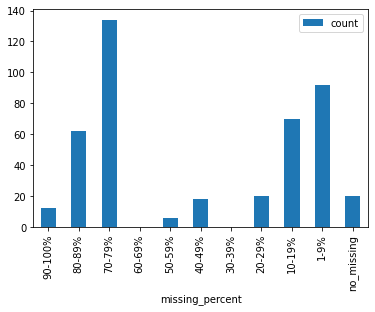

In [11]:
train_missing_df.plot.bar(x= 'missing_percent', y='count')

## each group missing check on TRAIN

In [12]:
train_df_check = train_df_check.reset_index()

In [13]:
feature_Transaction_table_check = train_df_check[train_df_check['index'].str.startswith("Transaction")]
feature_Transaction_missing_count_list = missing_count(feature_Transaction_table_check)

feature_Transaction2_table_check = train_df_check[train_df_check['index'].str.startswith("Prod")]
feature_Transaction2_missing_count_list = missing_count(feature_Transaction2_table_check)

feature_card_table_check = train_df_check[train_df_check['index'].str.startswith("card")]
feature_card_missing_count_list = missing_count(feature_card_table_check)

feature_addr1_table_check = train_df_check[train_df_check['index'].str.startswith("add")]
feature_addr1_missing_count_list = missing_count(feature_addr1_table_check)

feature_addr2_table_check = train_df_check[train_df_check['index'].str.startswith("dist")]
feature_addr2_missing_count_list = missing_count(feature_addr2_table_check)

feature_addr3_table_check = train_df_check[train_df_check['index'].str.startswith("P_")]
feature_addr3_missing_count_list = missing_count(feature_addr3_table_check)

feature_addr4_table_check = train_df_check[train_df_check['index'].str.startswith("R_")]
feature_addr4_missing_count_list = missing_count(feature_addr4_table_check)

feature_C_table_check = train_df_check[train_df_check['index'].str.startswith("C")]
feature_C_missing_count_list = missing_count(feature_C_table_check)

feature_D_table_check = train_df_check[train_df_check['index'].str.startswith("D")]
feature_D_missing_count_list = missing_count(feature_D_table_check)

feature_M_table_check = train_df_check[train_df_check['index'].str.startswith("M")]
feature_M_missing_count_list = missing_count(feature_M_table_check)

feature_V_table_check = train_df_check[train_df_check['index'].str.startswith("V")]
feature_V_missing_count_list = missing_count(feature_V_table_check)

feature_id_table_check = train_df_check[train_df_check['index'].str.startswith("id")]
feature_id_missing_count_list = missing_count(feature_id_table_check)

feature_Device_table_check = train_df_check[train_df_check['index'].str.startswith("Dev")]
feature_Device_missing_count_list = missing_count(feature_Device_table_check)

In [14]:
missing_ration_range = ['90-100%', '80-89%', '70-79%', '60-69%', '50-59%', '40-49%', '30-39%', '20-29%', '10-19%', '1-9%', 'no_missing']
train_fea_missing_df = pd.DataFrame(list(zip(missing_ration_range, 
                                       feature_Transaction_missing_count_list,
                                       feature_Transaction2_missing_count_list,
                                       feature_card_missing_count_list,
                                       feature_addr1_missing_count_list,
                                       feature_addr2_missing_count_list,
                                       feature_addr3_missing_count_list,
                                       feature_addr4_missing_count_list,
                                       feature_C_missing_count_list,
                                       feature_D_missing_count_list,
                                       feature_M_missing_count_list,
                                       feature_V_missing_count_list,
                                       feature_id_missing_count_list,
                                       feature_Device_missing_count_list)), 
                              columns= ['missing_percent', 'Transaction','Prod','card', 'addr', 'dist', 'P_', 'R_','C', 'D', 'M','V','id','Dev'])
train_fea_missing_df

missing_percent  Transaction  Prod  card  addr  dist  P_  R_   C  D  M  \
0          90-100%            0     0     0     0     1   0   0   0  1  0   
1           80-89%            0     0     0     0     0   0   0   0  6  0   
2           70-79%            0     0     0     0     0   0   1   0  2  0   
3           60-69%            0     0     0     0     0   0   0   0  0  0   
4           50-59%            0     0     0     0     1   0   0   0  1  4   
5           40-49%            0     0     0     0     0   0   0   0  3  4   
6           30-39%            0     0     0     0     0   0   0   0  0  0   
7           20-29%            0     0     0     0     0   0   0   0  1  1   
8           10-19%            0     0     0     2     0   1   0   0  2  0   
9             1-9%            0     0     5     0     0   0   0   0  1  0   
10      no_missing            3     1     1     0     0   0   0  14  0  0   

      V  id  Dev  
0     0  10    0  
1    47   9    0  
2   112  19    2  
3     0   0    0  
4     0   0    0  
5    11   0    0  
6     0   0    0  
7    18   0    0  
8    65   0    0  
9    86   0    0  
10    0   0    0

In [15]:
pickle.dump(train_fea_missing_df,open('/content/drive/MyDrive/fraud/kaggle/train_pickle/train_fea_missing_df.pickle', 'wb'))

In [16]:
train_prefect_df = train_df[train_df.notnull().all(1)]

In [17]:
train_prefect_df.shape

(0, 434)

## Missing on TRAIN

In [25]:
test_missing_count_list = missing_count(test_df_check)
missing_ration_range = ['90-100%', '80-89%', '70-79%', '60-69%', '50-59%', '40-49%', '30-39%', '20-29%', '10-19%', '1-9%', 'no_missing']
test_missing_df = pd.DataFrame(list(zip(missing_ration_range, test_missing_count_list)), columns= ['missing_percent', 'count']) 
test_missing_df

missing_percent  count
0          90-100%     10
1           80-89%     61
2           70-79%    137
3           60-69%      1
4           50-59%      1
5           40-49%      7
6           30-39%     16
7           20-29%      0
8           10-19%     22
9             1-9%    130
10      no_missing     48

<AxesSubplot:xlabel='missing_percent'>

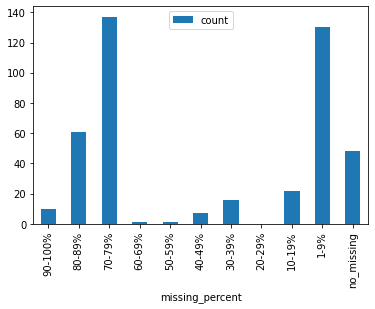

In [26]:
test_missing_df.plot.bar(x= 'missing_percent', y='count')

## each group missing check on TEST

In [27]:
test_df_check = test_df_check.reset_index()

In [28]:
feature_Transaction_table_check = test_df_check[test_df_check['index'].str.startswith("Transaction")]
feature_Transaction_missing_count_list = missing_count(feature_Transaction_table_check)

feature_Transaction2_table_check = test_df_check[test_df_check['index'].str.startswith("Prod")]
feature_Transaction2_missing_count_list = missing_count(feature_Transaction2_table_check)

feature_card_table_check = test_df_check[test_df_check['index'].str.startswith("card")]
feature_card_missing_count_list = missing_count(feature_card_table_check)

feature_addr1_table_check = test_df_check[test_df_check['index'].str.startswith("add")]
feature_addr1_missing_count_list = missing_count(feature_addr1_table_check)

feature_addr2_table_check = test_df_check[test_df_check['index'].str.startswith("dist")]
feature_addr2_missing_count_list = missing_count(feature_addr2_table_check)

feature_addr3_table_check = test_df_check[test_df_check['index'].str.startswith("P_")]
feature_addr3_missing_count_list = missing_count(feature_addr3_table_check)

feature_addr4_table_check = test_df_check[test_df_check['index'].str.startswith("R_")]
feature_addr4_missing_count_list = missing_count(feature_addr4_table_check)

feature_C_table_check = test_df_check[test_df_check['index'].str.startswith("C")]
feature_C_missing_count_list = missing_count(feature_C_table_check)

feature_D_table_check = test_df_check[test_df_check['index'].str.startswith("D")]
feature_D_missing_count_list = missing_count(feature_D_table_check)

feature_M_table_check = test_df_check[test_df_check['index'].str.startswith("M")]
feature_M_missing_count_list = missing_count(feature_M_table_check)

feature_V_table_check = test_df_check[test_df_check['index'].str.startswith("V")]
feature_V_missing_count_list = missing_count(feature_V_table_check)

feature_id_table_check = test_df_check[test_df_check['index'].str.startswith("id")]
feature_id_missing_count_list = missing_count(feature_id_table_check)

feature_Device_table_check = test_df_check[test_df_check['index'].str.startswith("Dev")]
feature_Device_missing_count_list = missing_count(feature_Device_table_check)

In [29]:
missing_ration_range = ['90-100%', '80-89%', '70-79%', '60-69%', '50-59%', '40-49%', '30-39%', '20-29%', '10-19%', '1-9%', 'no_missing']
test_fea_missing_df = pd.DataFrame(list(zip(missing_ration_range, 
                                       feature_Transaction_missing_count_list,
                                       feature_Transaction2_missing_count_list,
                                       feature_card_missing_count_list,
                                       feature_addr1_missing_count_list,
                                       feature_addr2_missing_count_list,
                                       feature_addr3_missing_count_list,
                                       feature_addr4_missing_count_list,
                                       feature_C_missing_count_list,
                                       feature_D_missing_count_list,
                                       feature_M_missing_count_list,
                                       feature_V_missing_count_list,
                                       feature_id_missing_count_list,
                                       feature_Device_missing_count_list)), 
                              columns= ['missing_percent', 'Transaction','Prod','card', 'addr', 'dist', 'P_', 'R_','C', 'D', 'M','V','id','Dev'])
test_fea_missing_df

missing_percent  Transaction  Prod  card  addr  dist  P_  R_   C  D  M  \
0          90-100%            0     0     0     0     1   0   0   0  0  0   
1           80-89%            0     0     0     0     0   0   0   0  4  0   
2           70-79%            0     0     0     0     0   0   1   0  5  0   
3           60-69%            0     0     0     0     0   0   0   0  0  1   
4           50-59%            0     0     0     0     1   0   0   0  0  0   
5           40-49%            0     0     0     0     0   0   0   0  3  4   
6           30-39%            0     0     0     0     0   0   0   0  1  4   
7           20-29%            0     0     0     0     0   0   0   0  0  0   
8           10-19%            0     0     0     2     0   1   0   0  1  0   
9             1-9%            0     0     5     0     0   0   0  14  3  0   
10      no_missing            3     1     1     0     0   0   0   0  0  0   

      V  id  Dev  
0     0   9    0  
1    47  10    0  
2   112  19    2  
3     0   0    0  
4     0   0    0  
5     0   0    0  
6    11   0    0  
7     0   0    0  
8    18   0    0  
9   108   0    0  
10   43   0    0

In [30]:
pickle.dump(test_fea_missing_df,open('/content/drive/MyDrive/fraud/kaggle/test_pickle/test_fea_missing_df.pickle', 'wb'))

In [31]:
test_prefect_df = test_df[test_df.notnull().all(1)]

In [32]:
test_prefect_df.shape

(0, 433)

In [38]:
feature_Transaction= ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD']
feature_card = ['TransactionID', 'TransactionDT','isFraud','card1', 'card2', 'card3', 'card4', 'card5', 'card6']
feature_addr_oth = ['TransactionID', 'TransactionDT','isFraud','addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain']
feature_C = ['TransactionID', 'TransactionDT', 'isFraud','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
feature_D = ['TransactionID', 'TransactionDT','isFraud','D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']
feature_M = ['TransactionID','TransactionDT', 'isFraud','M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
feature_V = ['TransactionID', 'TransactionDT','isFraud','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']
feature_id = ['TransactionID', 'TransactionDT','isFraud','id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']
feature_Device = ['TransactionID', 'TransactionDT','isFraud','DeviceType', 'DeviceInfo']

#EDA: feature_Transaction
* 'TransactionID', 'isFraud' >>> ID, Target
* 'TransactionDT', 'TransactionAmt >>> Our focus (int)
* 'ProductCD' >>> Our Focus (obj)

In [39]:
train_Transaction_df[['TransactionID','TransactionDT', 'TransactionAmt']].head(10)

TransactionID  TransactionDT  TransactionAmt
0        2987000          86400            68.5
1        2987001          86401            29.0
2        2987002          86469            59.0
3        2987003          86499            50.0
4        2987004          86506            50.0
5        2987005          86510            49.0
6        2987006          86522           159.0
7        2987007          86529           422.5
8        2987008          86535            15.0
9        2987009          86536           117.0

In [40]:
train_Transaction_df[['TransactionDT', 'TransactionAmt']].describe()

TransactionDT  TransactionAmt
count   5.905400e+05   590540.000000
mean    7.372311e+06             NaN
std     4.617224e+06             NaN
min     8.640000e+04        0.250977
25%     3.027058e+06       43.312500
50%     7.306528e+06       68.750000
75%     1.124662e+07      125.000000
max     1.581113e+07    31936.000000

In [41]:
test_Transaction_df[['TransactionDT', 'TransactionAmt']].describe()

TransactionDT  TransactionAmt
count   5.066910e+05   506691.000000
mean    2.692994e+07             NaN
std     4.756507e+06             NaN
min     1.840322e+07        0.018005
25%     2.277154e+07       40.000000
50%     2.720466e+07       67.937500
75%     3.134856e+07      125.000000
max     3.421434e+07    10272.000000

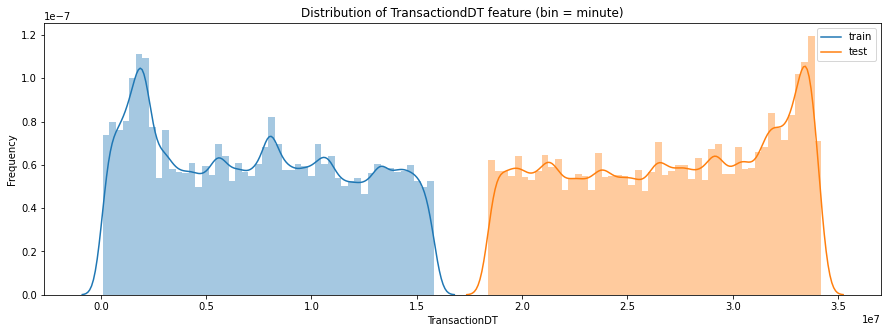

In [42]:
plt.figure(figsize = (15,5))
sns.distplot(train_Transaction_df['TransactionDT'])#,kde = False)#,bins=60)
sns.distplot(test_Transaction_df['TransactionDT'])#,kde = False)#,bins=60)
plt.legend(['train', 'test'])
plt.ylabel('Frequency')

plt.title('Distribution of TransactiondDT feature (bin = minute)');
plt.show()

#TransactionDT
TransactionDT: timedelta from a given reference datetime (not an actual timestamp

In [43]:
#day features

train_Transaction_df['day'] = (train_Transaction_df['TransactionDT'] //(3600*24)-1)+1
test_Transaction_df['day'] = (test_Transaction_df['TransactionDT'] //(3600*24)-1)+1

In [44]:
train_Transaction_df['day'].max()

182

In [45]:
train_trans_day_count= train_Transaction_df.groupby(by = ['day'])[['TransactionID']].count()
train_trans_day_count.reset_index(inplace= True)

test_trans_day_count= test_Transaction_df.groupby(by = ['day'])[['TransactionID']].count()
test_trans_day_count.reset_index(inplace= True)

In [46]:
train_trans_day_count.head()

day  TransactionID
0    1           5122
1    2           3730
2    3           3241
3    4           4036
4    5           3964

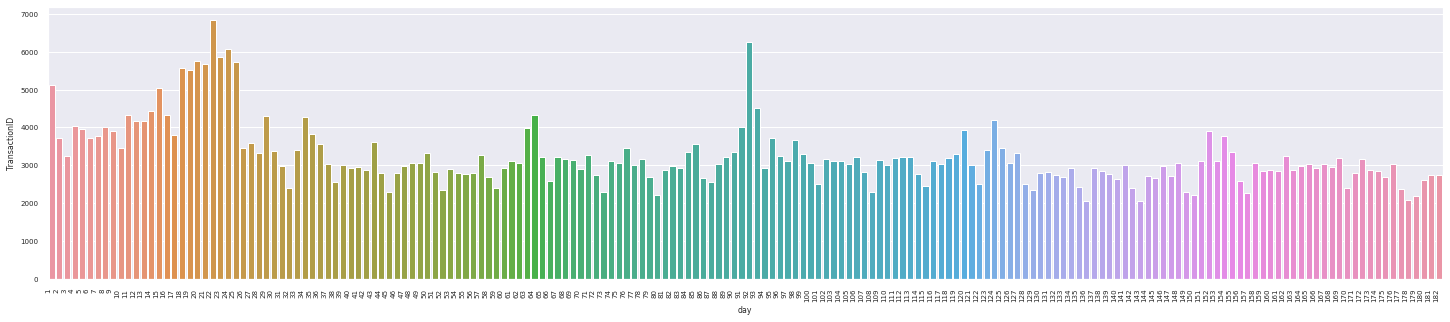

In [47]:
plt.figure(figsize = (25,5))
sns.set(font_scale=0.65)

g = sns.barplot(data=train_trans_day_count, x= 'day', y= 'TransactionID' )
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

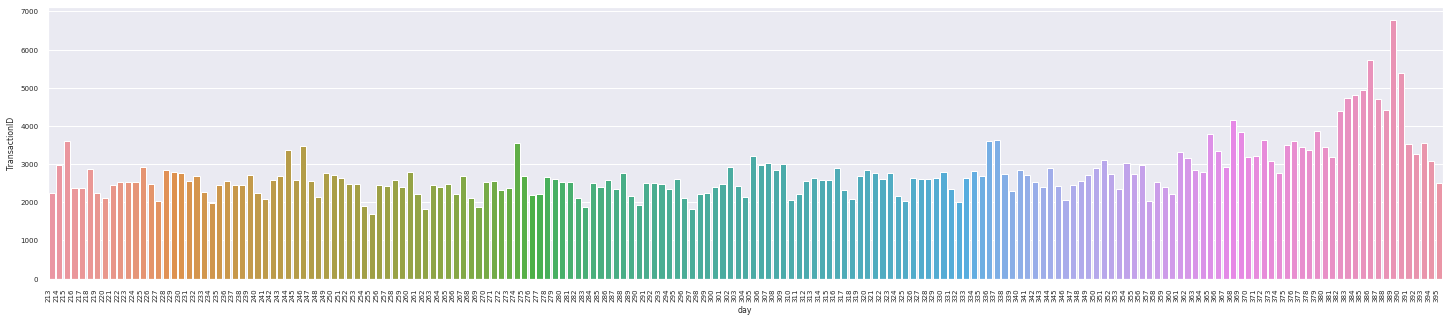

In [48]:
plt.figure(figsize = (25,5))
sns.set(font_scale=0.65)

g = sns.barplot(data=test_trans_day_count, x= 'day', y= 'TransactionID' )
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

### TransactionDT to day >> Month

In [49]:
#Month features

train_Transaction_df['month'] = ((train_Transaction_df['TransactionDT'] //(3600*24)-1)%30)+1
test_Transaction_df['month'] = ((test_Transaction_df['TransactionDT'] //(3600*24)-1)%30)+1

In [50]:
train_Transaction_df['month'].describe()

count    590540.000000
mean         15.053952
std           8.761433
min           1.000000
25%           7.000000
50%          15.000000
75%          23.000000
max          30.000000
Name: month, dtype: float64

In [51]:
def get_month(day):
    month_list = []

    for d in day:
        if 1 <= d <= 31:
            month_list.append("1")
        elif 32<= d <= 60:
            month_list.append("2")
        elif 61<= d <= 91:
            month_list.append("3")
        elif 92<= d <= 121:
            month_list.append("4")
        elif 122<= d <= 152:
            month_list.append("5")
        elif 153<= d <= 182:
            month_list.append("6")
        elif 213<= d <= 243:
            month_list.append("7")
        elif 244<= d <= 274:
            month_list.append("8")
        elif 275<= d <= 304:
            month_list.append("9")
        elif 305<= d <= 335:
            month_list.append("10")
        elif 336<= d <= 365:
            month_list.append("11")
        else:
            month_list.append("12")

    return month_list

In [52]:
train_month_list = get_month(train_Transaction_df['day'])
train_Transaction_df['month'] = train_month_list
train_Transaction_df['month'] = train_Transaction_df['month'].astype(int)

test_month_list = get_month(test_Transaction_df['day'])
test_Transaction_df['month'] = test_month_list
test_Transaction_df['month'] = test_Transaction_df['month'].astype(int)

In [54]:
train_Transaction_df.head(10)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  day  month
0        2987000        0          86400            68.5         W    1      1
1        2987001        0          86401            29.0         W    1      1
2        2987002        0          86469            59.0         W    1      1
3        2987003        0          86499            50.0         W    1      1
4        2987004        0          86506            50.0         H    1      1
5        2987005        0          86510            49.0         W    1      1
6        2987006        0          86522           159.0         W    1      1
7        2987007        0          86529           422.5         W    1      1
8        2987008        0          86535            15.0         H    1      1
9        2987009        0          86536           117.0         W    1      1

In [55]:
train_Transaction_df.shape

(590540, 7)

In [56]:
fraud_month_df = train_Transaction_df.groupby(['isFraud','month'])[['month']].count()
fraud_month_df = fraud_month_df.rename(columns= {'month': 'count'})
fraud_month_df.reset_index(inplace = True)
fraud_month_df

isFraud  month   count
0         0      1  133771
1         0      2   82989
2         0      3   92292
3         0      4   93786
4         0      5   84603
5         0      6   82436
6         1      1    3550
7         1      2    3428
8         1      3    3904
9         1      4    3839
10        1      5    2948
11        1      6    2994

In [57]:
fraud_month_df.columns

Index(['isFraud', 'month', 'count'], dtype='object')

<AxesSubplot:xlabel='month', ylabel='count'>

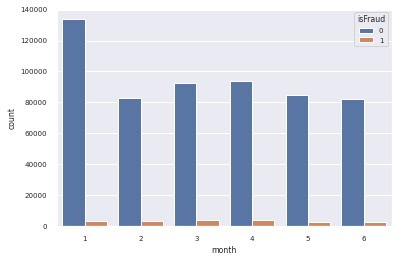

In [58]:
sns.barplot(data= fraud_month_df, x='month', y='count', hue= 'isFraud')

  - MONTH  3 and 4 was Heighest FRAUD
  - MONTH 5 and 6 was Lowest FRAUD

### TransactionDT to day >> Month >> day_month(30 day)


In [60]:
#day_month  features

train_Transaction_df['day_month'] = ((train_Transaction_df['TransactionDT'] //(3600*24)-1)%30)+1
test_Transaction_df['day_month'] = ((test_Transaction_df['TransactionDT'] //(3600*24)-1)%30)+1

In [61]:
train_Transaction_df['day_month'].max()

30

In [62]:
fraud_daymonth_df = train_Transaction_df.groupby(['isFraud','day_month'])[['day_month']].count()
fraud_daymonth_df = fraud_daymonth_df.rename(columns= {'day_month': 'count'})
fraud_daymonth_df.reset_index(inplace = True)
fraud_daymonth_df

isFraud  day_month  count
0         0          1  23184
1         0          2  23794
2         0          3  20855
3         0          4  22761
4         0          5  20686
5         0          6  18175
6         0          7  18065
7         0          8  18329
8         0          9  17870
9         0         10  17385
10        0         11  18087
11        0         12  18350
12        0         13  18015
13        0         14  18738
14        0         15  18241
15        0         16  18117
16        0         17  17868
17        0         18  19194
18        0         19  19686
19        0         20  18648
20        0         21  19671
21        0         22  20252
22        0         23  19231
23        0         24  19895
24        0         25  19259
25        0         26  17270
26        0         27  16842
27        0         28  16723
28        0         29  17008
29        0         30  17678
30        1          1    895
31        1          2    789
32        1          3    783
33        1          4    772
34        1          5    847
35        1          6    566
36        1          7    670
37        1          8    593
38        1          9    678
39        1         10    624
40        1         11    637
41        1         12    590
42        1         13    746
43        1         14    656
44        1         15    648
45        1         16    650
46        1         17    657
47        1         18    700
48        1         19    692
49        1         20    697
50        1         21    670
51        1         22    679
52        1         23    640
53        1         24    631
54        1         25    640
55        1         26    771
56        1         27    690
57        1         28    618
58        1         29    688
59        1         30    746

<AxesSubplot:xlabel='day_month', ylabel='count'>

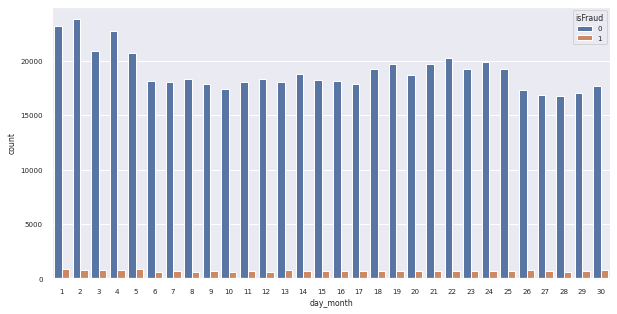

In [63]:
plt.figure(figsize = (10,5))
sns.barplot(data= fraud_daymonth_df, x='day_month', y='count', hue= 'isFraud')

### TransactionDT to day >> Month >> day_month(30 day) >> day_week (7day)

In [65]:
#dayweek features

train_Transaction_df['day_week'] = ((train_Transaction_df['TransactionDT'] //(3600*24)-1)%7)+1
test_Transaction_df['day_week'] = ((test_Transaction_df['TransactionDT'] //(3600*24)-1)%7)+1

In [66]:
train_Transaction_df['day_week'].max()

7

In [67]:
fraud_dayweek_df = train_Transaction_df.groupby(['isFraud','day_week'])[['day_week']].count()
fraud_dayweek_df = fraud_dayweek_df.rename(columns= {'day_week': 'count'})
fraud_dayweek_df.reset_index(inplace = True)
fraud_dayweek_df

isFraud  day_week  count
0         0         1  94952
1         0         2  76871
2         0         3  67720
3         0         4  82746
4         0         5  82012
5         0         6  82410
6         0         7  83166
7         1         1   3550
8         1         2   2963
9         1         3   2503
10        1         4   2687
11        1         5   2803
12        1         6   2946
13        1         7   3211

<AxesSubplot:xlabel='day_week', ylabel='count'>

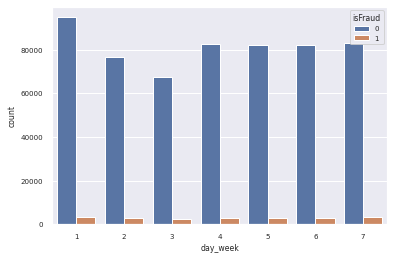

In [68]:
sns.barplot(data= fraud_dayweek_df, x='day_week', y='count', hue= 'isFraud')

# TransactionAMT
TransactionAMT: transaction payment amount in USD

In [70]:
train_Transaction_df['TransactionAmt'].describe()

count    590540.000000
mean               NaN
std                NaN
min           0.250977
25%          43.312500
50%          68.750000
75%         125.000000
max       31936.000000
Name: TransactionAmt, dtype: float64

<AxesSubplot:xlabel='TransactionDT', ylabel='TransactionAmt'>

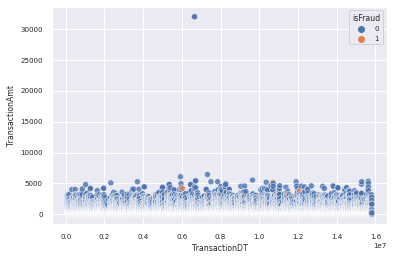

In [71]:
sns.scatterplot(x = "TransactionDT", y = "TransactionAmt", hue = "isFraud", data = train_Transaction_df, alpha = 0.8, hue_order = [0,1])

In [72]:
train_Transaction_df['TransactionAmt'].max()

31940.0

In [73]:
train_Transaction_df[train_Transaction_df.TransactionAmt > 30000]

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  day  \
274336        3261336        0        6652360         31936.0         W   76   
274339        3261339        0        6652391         31936.0         W   76   

        month  day_month  day_week  
274336      3         16         6  
274339      3         16         6

Remove outlier

In [74]:
train_Transaction_df = train_Transaction_df[train_Transaction_df['TransactionAmt'] < 30000]
train_df = train_df[train_df['TransactionAmt'] < 30000]

In [75]:
train_Transaction_df['TransactionAmt'].describe()

count    590538.000000
mean               NaN
std                NaN
min           0.250977
25%          43.312500
50%          68.750000
75%         125.000000
max        6452.000000
Name: TransactionAmt, dtype: float64

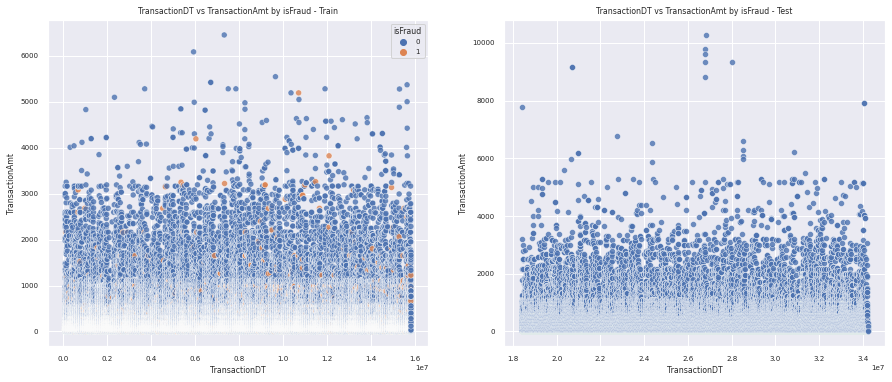

In [76]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
g1 = sns.scatterplot(x = "TransactionDT", y = "TransactionAmt", hue = "isFraud", data = train_Transaction_df, alpha = 0.8, hue_order = [0,1])

plt.title('TransactionDT vs TransactionAmt by isFraud - Train')
plt.subplot(1,2,2)
sns.scatterplot(x = "TransactionDT",y="TransactionAmt", data=test_Transaction_df, alpha=0.8, hue_order = [0,1])

plt.title('TransactionDT vs TransactionAmt by isFraud - Test')
plt.show()

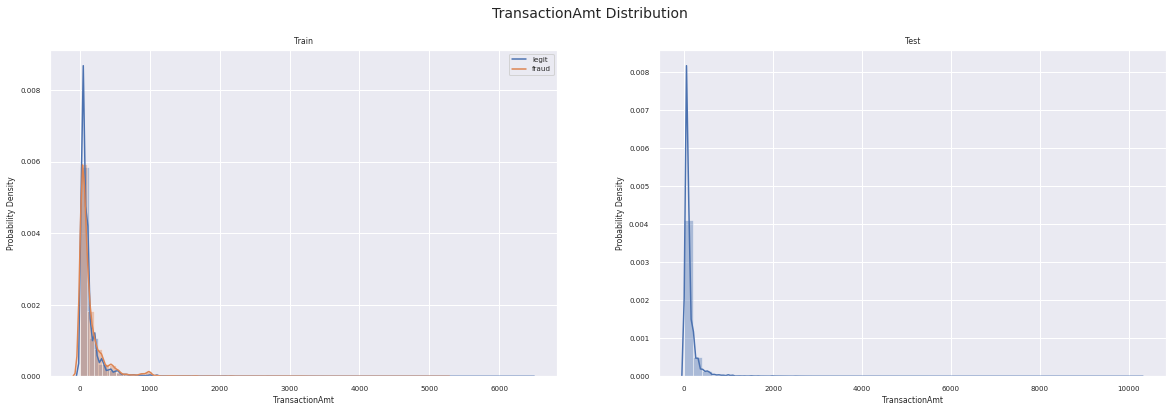

In [77]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

sns.distplot(train_Transaction_df[train_Transaction_df['isFraud']==0]['TransactionAmt'])
sns.distplot(train_Transaction_df[train_Transaction_df['isFraud']==1]['TransactionAmt'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')

plt.suptitle('TransactionAmt Distribution' , fontsize = 14)


plt.subplot(1,2,2)

sns.distplot(test_Transaction_df['TransactionAmt'])
plt.ylabel('Probability Density')
plt.title('Test')
plt.show()

Log Transformation

In [78]:
#LogTransaction

train_Transaction_df['LogTransactionAmt'] = np.log(train_Transaction_df['TransactionAmt'])
train_df['LogTransactionAmt'] = np.log(train_df['TransactionAmt'])

test_Transaction_df['LogTransactionAmt'] = np.log(test_Transaction_df['TransactionAmt'])
test_df['LogTransactionAmt'] = np.log(test_df['TransactionAmt'])

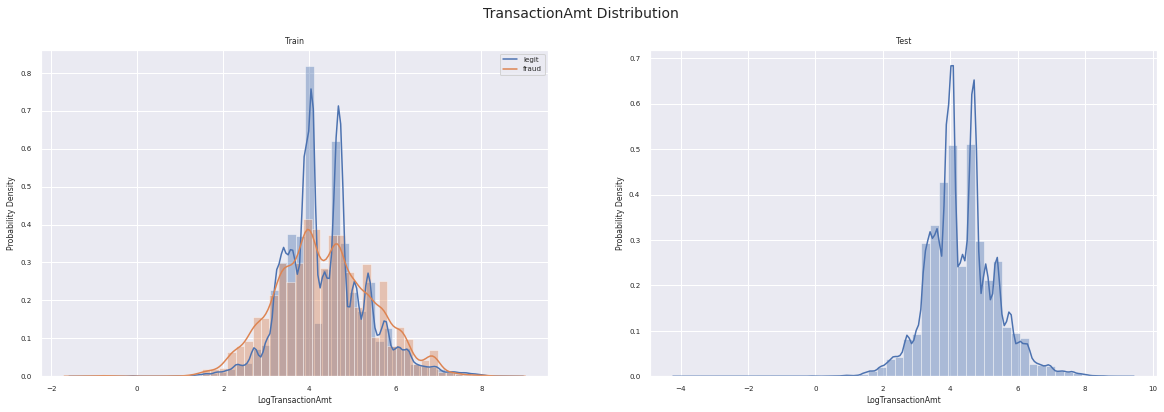

In [79]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

sns.distplot(train_Transaction_df[train_Transaction_df['isFraud']==0]['LogTransactionAmt'])
sns.distplot(train_Transaction_df[train_Transaction_df['isFraud']==1]['LogTransactionAmt'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')

plt.suptitle('TransactionAmt Distribution' , fontsize = 14)


plt.subplot(1,2,2)

sns.distplot(test_Transaction_df['LogTransactionAmt'])
plt.ylabel('Probability Density')
plt.title('Test')
plt.show()

# ProductCD
ProductCD: product code, the product for each transaction

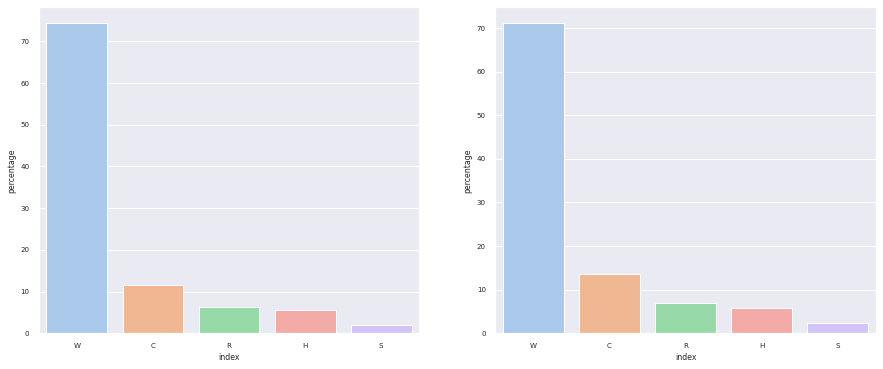

In [80]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
train_ProductCD = train_Transaction_df['ProductCD'].value_counts(normalize=True).mul(100).rename('percentage')\
.reset_index()
sns.barplot(x = "index", y = "percentage", data=train_ProductCD, palette = 'pastel')

plt.subplot(1,2,2)
test_ProductCD =test_Transaction_df['ProductCD'].value_counts(normalize=True).mul(100).rename('percentage')\
.reset_index()
sns.barplot(x = "index", y = "percentage", data = test_ProductCD, palette = 'pastel')

plt.show();

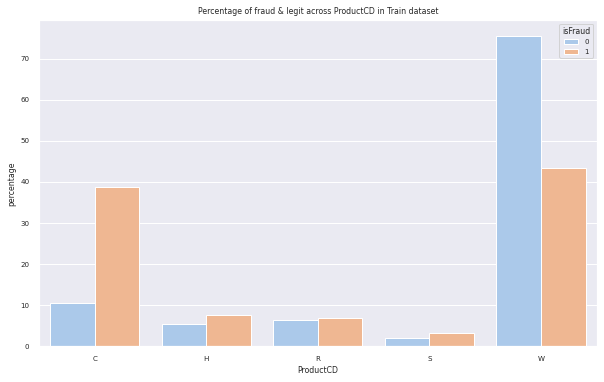

In [81]:
plt.figure(figsize = (10,6))

train_ProductCD = (train_Transaction_df.groupby(['isFraud'])['ProductCD'].value_counts(normalize = True).rename('percentage').mul(100).reset_index().sort_values('ProductCD'))
sns.barplot(x = "ProductCD", y = "percentage", hue = "isFraud", data = train_ProductCD, palette = 'pastel')
plt.title('Percentage of fraud & legit across ProductCD in Train dataset')
plt.show();

# card
card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

In [82]:
feature_card

['TransactionID',
 'TransactionDT',
 'isFraud',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6']

In [83]:
train_card_df.head()

TransactionID  TransactionDT  isFraud  card1  card2  card3       card4  \
0        2987000          86400        0  13926    NaN  150.0    discover   
1        2987001          86401        0   2755  404.0  150.0  mastercard   
2        2987002          86469        0   4663  490.0  150.0        visa   
3        2987003          86499        0  18132  567.0  150.0  mastercard   
4        2987004          86506        0   4497  514.0  150.0  mastercard   

   card5   card6  
0  142.0  credit  
1  102.0  credit  
2  166.0   debit  
3  117.0   debit  
4  102.0  credit

In [85]:
train_card_df = pd.merge(train_card_df, train_Transaction_df, how= 'right')
train_card_df.head()

TransactionID  TransactionDT  isFraud  card1  card2  card3       card4  \
0        2987000          86400        0  13926    NaN  150.0    discover   
1        2987001          86401        0   2755  404.0  150.0  mastercard   
2        2987002          86469        0   4663  490.0  150.0        visa   
3        2987003          86499        0  18132  567.0  150.0  mastercard   
4        2987004          86506        0   4497  514.0  150.0  mastercard   

   card5   card6  TransactionAmt ProductCD  day  month  day_month  day_week  \
0  142.0  credit            68.5         W    1      1          1         1   
1  102.0  credit            29.0         W    1      1          1         1   
2  166.0   debit            59.0         W    1      1          1         1   
3  117.0   debit            50.0         W    1      1          1         1   
4  102.0  credit            50.0         H    1      1          1         1   

   LogTransactionAmt  
0           4.226562  
1           3.367188  
2           4.078125  
3           3.912109  
4           3.912109

In [86]:
train_card_df.isnull().sum()

TransactionID           0
TransactionDT           0
isFraud                 0
card1                   0
card2                8933
card3                1565
card4                1577
card5                4259
card6                1571
TransactionAmt          0
ProductCD               0
day                     0
month                   0
day_month               0
day_week                0
LogTransactionAmt       0
dtype: int64

In [87]:
train_card_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590538 entries, 0 to 590537
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TransactionID      590538 non-null  int32  
 1   TransactionDT      590538 non-null  int32  
 2   isFraud            590538 non-null  int8   
 3   card1              590538 non-null  int16  
 4   card2              581605 non-null  float16
 5   card3              588973 non-null  float16
 6   card4              588961 non-null  object 
 7   card5              586279 non-null  float16
 8   card6              588967 non-null  object 
 9   TransactionAmt     590538 non-null  float16
 10  ProductCD          590538 non-null  object 
 11  day                590538 non-null  int32  
 12  month              590538 non-null  int64  
 13  day_month          590538 non-null  int32  
 14  day_week           590538 non-null  int32  
 15  LogTransactionAmt  590538 non-null  float16
dtypes:

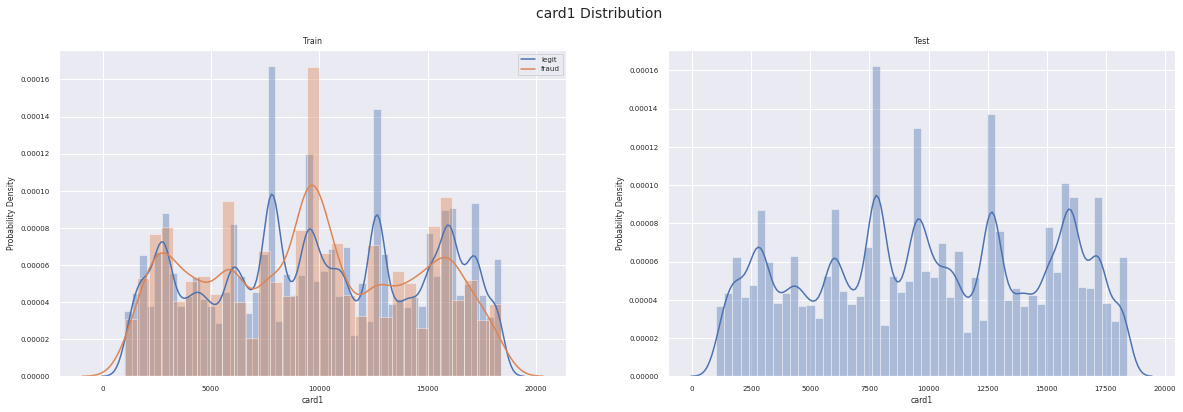

In [88]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

sns.distplot(train_card_df[train_card_df['isFraud']==0]['card1'])
sns.distplot(train_card_df[train_card_df['isFraud']==1]['card1'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')

plt.suptitle('card1 Distribution' , fontsize = 14)


plt.subplot(1,2,2)

sns.distplot(test_card_df['card1'])
plt.ylabel('Probability Density')
plt.title('Test')
plt.show()

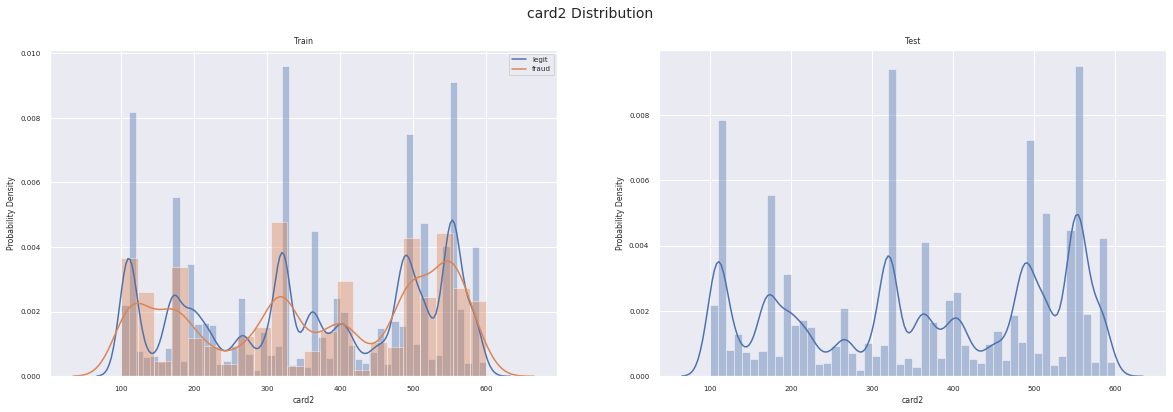

In [89]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

sns.distplot(train_card_df[train_card_df['isFraud']==0]['card2'])
sns.distplot(train_card_df[train_card_df['isFraud']==1]['card2'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')

plt.suptitle('card2 Distribution' , fontsize = 14)


plt.subplot(1,2,2)

sns.distplot(test_card_df['card2'])
plt.ylabel('Probability Density')
plt.title('Test')
plt.show()

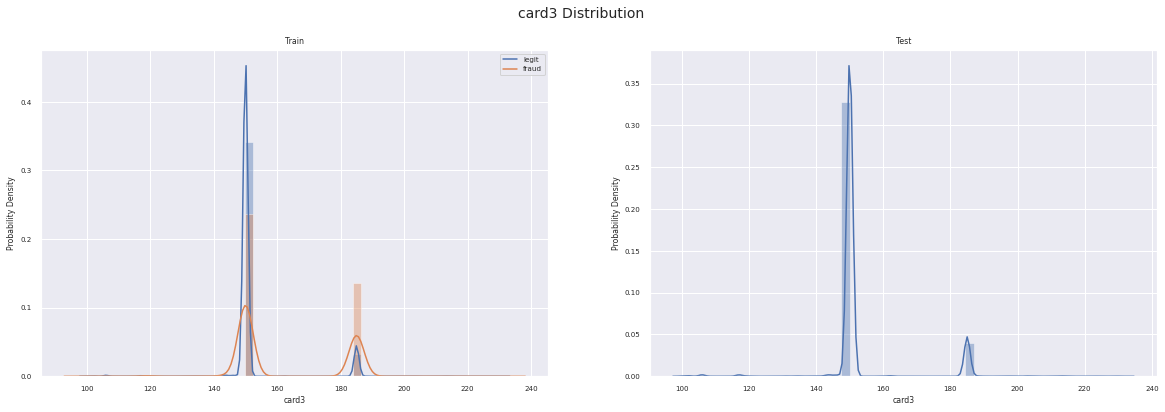

In [90]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

sns.distplot(train_card_df[train_card_df['isFraud']==0]['card3'])
sns.distplot(train_card_df[train_card_df['isFraud']==1]['card3'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')

plt.suptitle('card3 Distribution' , fontsize = 14)


plt.subplot(1,2,2)

sns.distplot(test_card_df['card3'])
plt.ylabel('Probability Density')
plt.title('Test')
plt.show()

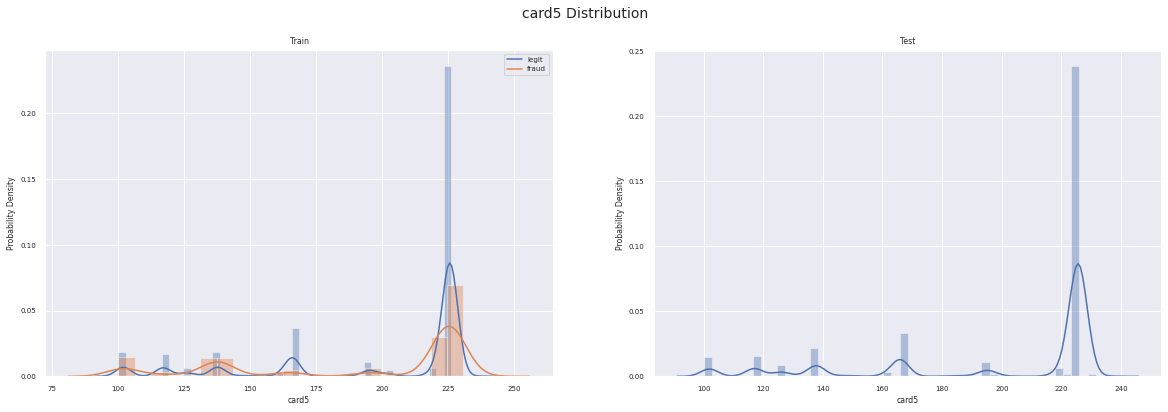

In [91]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

sns.distplot(train_card_df[train_card_df['isFraud']==0]['card5'])
sns.distplot(train_card_df[train_card_df['isFraud']==1]['card5'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')

plt.suptitle('card5 Distribution' , fontsize = 14)


plt.subplot(1,2,2)

sns.distplot(test_card_df['card5'])
plt.ylabel('Probability Density')
plt.title('Test')
plt.show()

In [92]:
train_df_check.apply(lambda row: row[train_df_check['index'].isin(feature_card)]).sort_values(by= 'corr offtake', ascending = False)

level_0          index    types  counts  distincts  nulls  \
432      432        isFraud     int8  590540          2      0   
326      326          card3  float16  588975        115   1565   
433      433  TransactionID    int32  590540     590540      0   
420      420  TransactionDT    int32  590540     573349      0   
322      322          card2  float16  581607        501   8933   
424      424          card1    int16  590540      13553      0   
323      323          card5  float16  586281        120   4259   
324      324          card4   object  588963          5   1577   
325      325          card6   object  588969          5   1571   

     missing_ration                                            uniques  \
432        0.000000                                             [0, 1]   
326        0.265012  [150.0, 117.0, 185.0, 143.0, 144.0, 163.0, 146...   
433        0.000000  [2987000, 2987001, 2987002, 2987003, 2987004, ...   
420        0.000000  [86400, 86401, 86469, 86499, 86506, 86510, 865...   
322        1.512683  [nan, 404.0, 490.0, 567.0, 514.0, 555.0, 360.0...   
424        0.000000  [13926, 2755, 4663, 18132, 4497, 5937, 12308, ...   
323        0.721204  [142.0, 102.0, 166.0, 117.0, 226.0, 224.0, 134...   
324        0.267044  [discover, mastercard, visa, american express,...   
325        0.266028  [credit, debit, nan, debit or credit, charge c...   

         skewness   kurtosis  corr offtake  
432  5.061223e+00  23.616056      1.000000  
326           NaN        NaN      0.154151  
433 -3.024053e-16  -1.200000      0.014166  
420  1.311547e-01  -1.229137      0.013103  
322           NaN        NaN      0.003388  
424 -4.092898e-02  -1.136158     -0.013640  
323           NaN        NaN     -0.033580  
324           NaN        NaN           NaN  
325           NaN        NaN           NaN

Text(0.5, 0.98, 'card1 by Day(TransactionDT)')

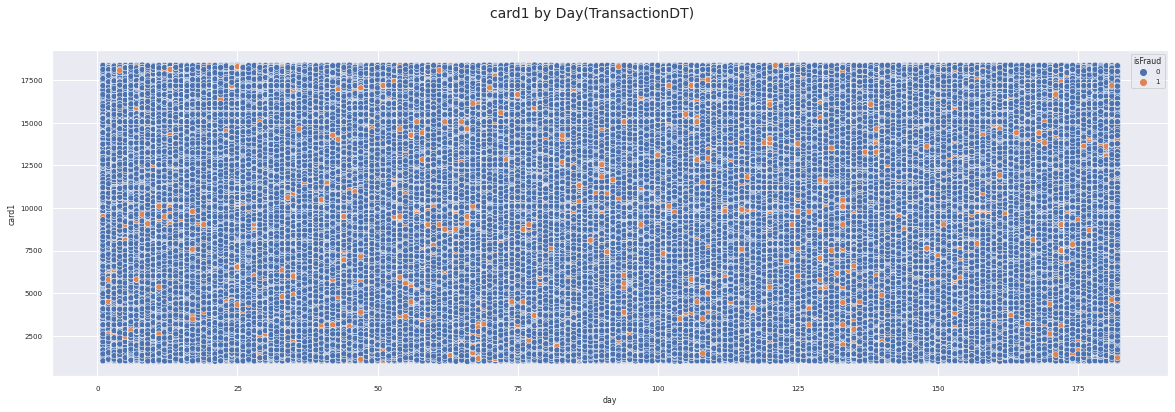

In [93]:
plt.figure(figsize = (20,6))
sns.scatterplot(x = "day", y = "card1", hue = "isFraud", data = train_card_df, hue_order = [0,1])
plt.suptitle('card1 by Day(TransactionDT)' , fontsize = 14)

Text(0.5, 0.98, 'card2 by Day(TransactionDT)')

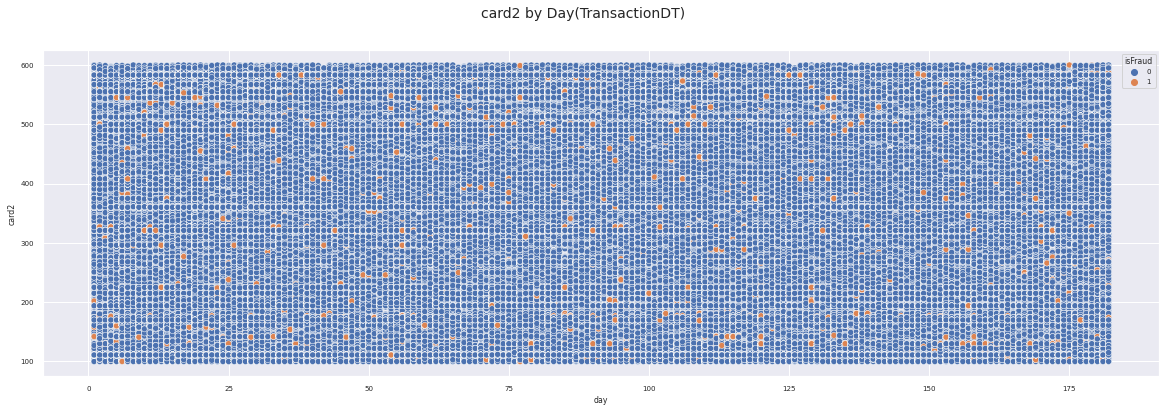

In [94]:
plt.figure(figsize = (20,6))
sns.scatterplot(x = "day", y = "card2", hue = "isFraud", data = train_card_df, hue_order = [0,1])
plt.suptitle('card2 by Day(TransactionDT)' , fontsize = 14)

Text(0.5, 0.98, 'card3 by Day(TransactionDT)')

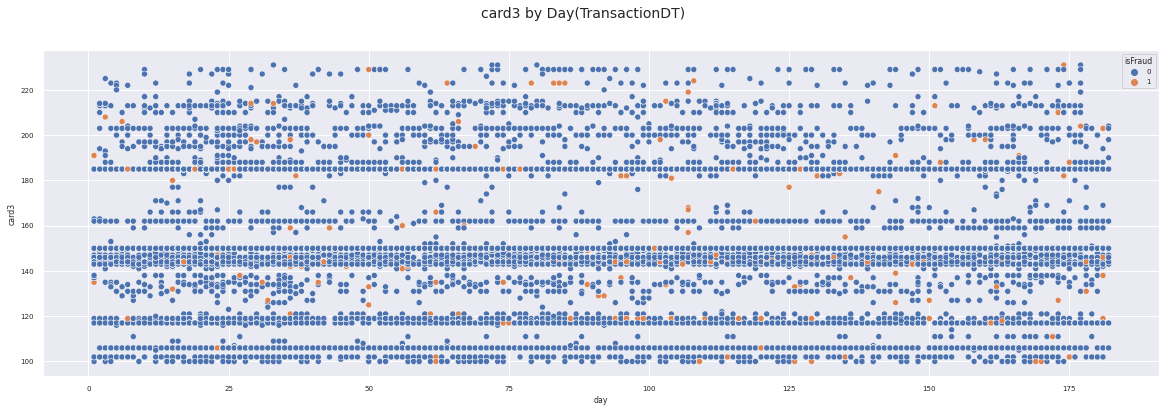

In [95]:
plt.figure(figsize = (20,6))
sns.scatterplot(x = "day", y = "card3", hue = "isFraud", data = train_card_df, hue_order = [0,1])
plt.suptitle('card3 by Day(TransactionDT)' , fontsize = 14)

Text(0.5, 0.98, 'card5 by Day(TransactionDT)')

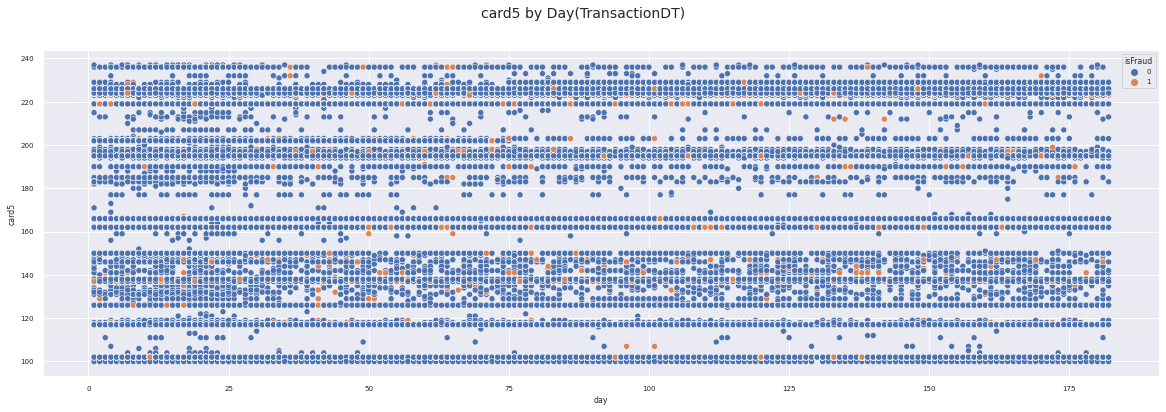

In [96]:
plt.figure(figsize = (20,6))
sns.scatterplot(x = "day", y = "card5", hue = "isFraud", data = train_card_df, hue_order = [0,1])
plt.suptitle('card5 by Day(TransactionDT)' , fontsize = 14)

In [97]:
train_card_df['card4'].unique()

array(['discover', 'mastercard', 'visa', 'american express', nan],
      dtype=object)

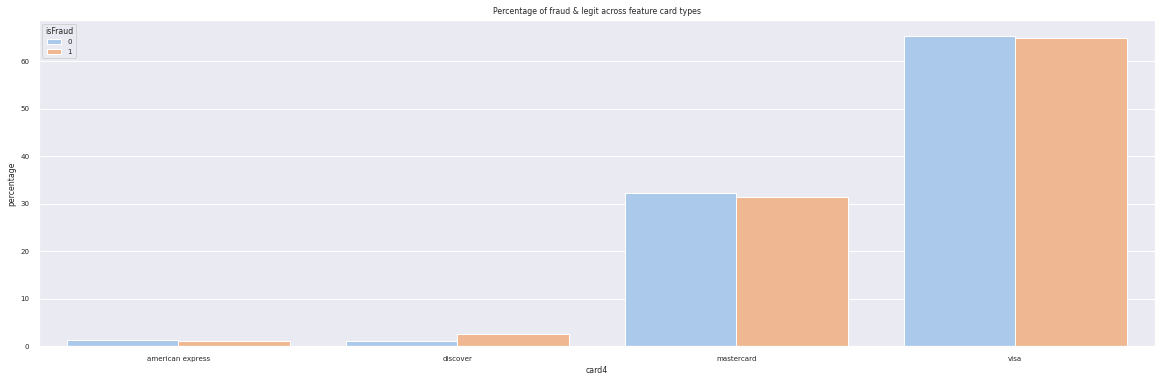

In [98]:
#card 4
plt.figure(figsize = (20, 6))
train_card4 = (train_card_df[~train_card_df['card4'].isnull()].groupby(['isFraud'])['card4'].value_counts(normalize = True).rename('percentage').mul(100).reset_index().sort_values('card4'))
sns.barplot(x = "card4", y = "percentage", hue = "isFraud", data = train_card4, palette = 'pastel')

plt.title('Percentage of fraud & legit across feature card types')

plt.show()

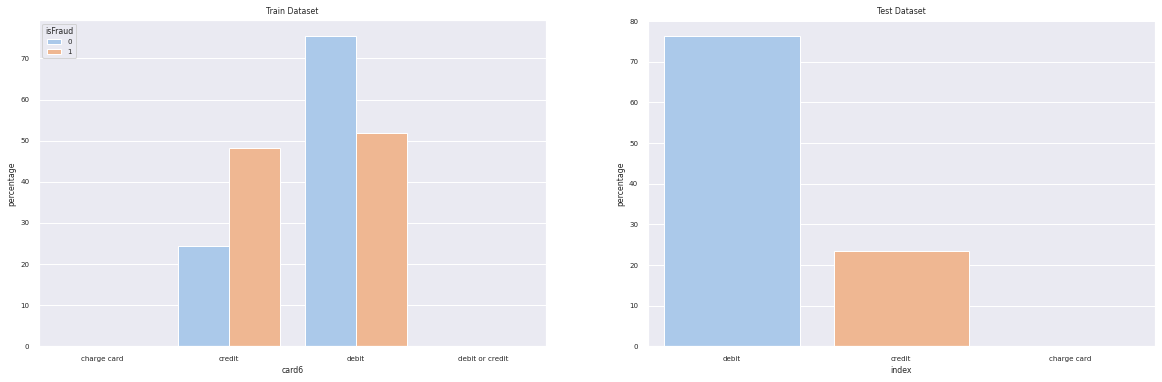

In [99]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
train_card6 = (train_card_df[~train_card_df['card6'].isnull()].groupby(['isFraud'])['card6']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card6'))

sns.barplot(x = "card6", y = "percentage", hue = "isFraud", data = train_card6, palette = 'pastel')
plt.title('Train Dataset')
plt.subplot(1,2,2)
test_card6 =test_card_df[~test_card_df['card6'].isnull()]['card6'].value_counts(normalize=True).mul(100).rename('percentage')\
.reset_index()
sns.barplot(x = "index", y = "percentage", data = test_card6, palette = 'pastel')

plt.title('Test Dataset')
plt.show();

In [100]:
def replacetodbcard(row):
    if row == np.nan:
        return row
    if row == 'debit or credit' or row == 'charge card':
        return 'debit'
    else:
        return row

In [101]:
train_card_df['card6'] = train_card_df['card6'].apply(replacetodbcard)
train_df['card6'] = train_df['card6'].apply(replacetodbcard)

test_card_df['card6'] = test_card_df['card6'].apply(replacetodbcard)
test_df['card6'] = test_df['card6'].apply(replacetodbcard)

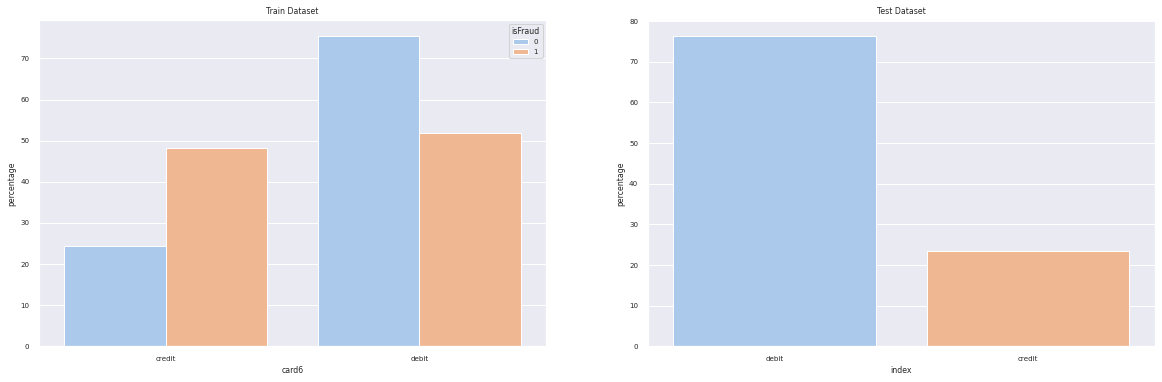

In [102]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
train_card6 = (train_card_df[~train_card_df['card6'].isnull()].groupby(['isFraud'])['card6']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card6'))

sns.barplot(x = "card6", y = "percentage", hue = "isFraud", data = train_card6, palette = 'pastel')
plt.title('Train Dataset')
plt.subplot(1,2,2)
test_card6 =test_card_df[~test_card_df['card6'].isnull()]['card6'].value_counts(normalize=True).mul(100).rename('percentage')\
.reset_index()
sns.barplot(x = "index", y = "percentage", data = test_card6, palette = 'pastel')

plt.title('Test Dataset')
plt.show();

#feature_addr_oth
* addr: address
* dist: distance
* P_ and (R__) emaildomain: purchaser and recipient email domain

### addr

In [103]:
feature_addr_oth

['TransactionID',
 'TransactionDT',
 'isFraud',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain']

In [104]:
train_addr_oth_df.head()

TransactionID  TransactionDT  isFraud  addr1  addr2  dist1  dist2  \
0        2987000          86400        0  315.0   87.0   19.0    NaN   
1        2987001          86401        0  325.0   87.0    NaN    NaN   
2        2987002          86469        0  330.0   87.0  287.0    NaN   
3        2987003          86499        0  476.0   87.0    NaN    NaN   
4        2987004          86506        0  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain  
0           NaN           NaN  
1     gmail.com           NaN  
2   outlook.com           NaN  
3     yahoo.com           NaN  
4     gmail.com           NaN

In [105]:
train_addr_oth_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  590540 non-null  int32  
 1   TransactionDT  590540 non-null  int32  
 2   isFraud        590540 non-null  int8   
 3   addr1          524834 non-null  float16
 4   addr2          524834 non-null  float16
 5   dist1          238269 non-null  float16
 6   dist2          37627 non-null   float16
 7   P_emaildomain  496084 non-null  object 
 8   R_emaildomain  137291 non-null  object 
dtypes: float16(4), int32(2), int8(1), object(2)
memory usage: 23.1+ MB


In [106]:
train_df_check.apply(lambda row: row[train_df_check['index'].isin(feature_addr_oth)]).sort_values(by= 'corr offtake', ascending = False)

level_0          index    types  counts  distincts   nulls  \
432      432        isFraud     int8  590540          2       0   
208      208          dist1  float16  238269       2413  352271   
433      433  TransactionID    int32  590540     590540       0   
420      420  TransactionDT    int32  590540     573349       0   
320      320          addr1  float16  524834        333   65706   
9          9          dist2  float16   37627       1700  552913   
321      321          addr2  float16  524834         75   65706   
125      125  R_emaildomain   object  137291         61  453249   
252      252  P_emaildomain   object  496084         60   94456   

     missing_ration                                            uniques  \
432        0.000000                                             [0, 1]   
208       59.652352  [19.0, nan, 287.0, 36.0, 0.0, 3.0, 5.0, 4.0, 1...   
433        0.000000  [2987000, 2987001, 2987002, 2987003, 2987004, ...   
420        0.000000  [86400, 86401, 86469, 86499, 86506, 86510, 865...   
320       11.126427  [315.0, 325.0, 330.0, 476.0, 420.0, 272.0, 126...   
9         93.628374  [nan, 30.0, 98.0, 149.0, 84.0, 100.0, 744.0, 1...   
321       11.126427  [87.0, nan, 96.0, 35.0, 60.0, 98.0, 43.0, 65.0...   
125       76.751617  [nan, gmail.com, hotmail.com, outlook.com, ano...   
252       15.994852  [nan, gmail.com, outlook.com, yahoo.com, mail....   

         skewness   kurtosis  corr offtake  
432  5.061223e+00  23.616056      1.000000  
208           NaN        NaN      0.021523  
433 -3.024053e-16  -1.200000      0.014166  
420  1.311547e-01  -1.229137      0.013103  
320           NaN        NaN      0.005596  
9             inf        NaN     -0.019054  
321           NaN        NaN     -0.030387  
125           NaN        NaN           NaN  
252           NaN        NaN           NaN

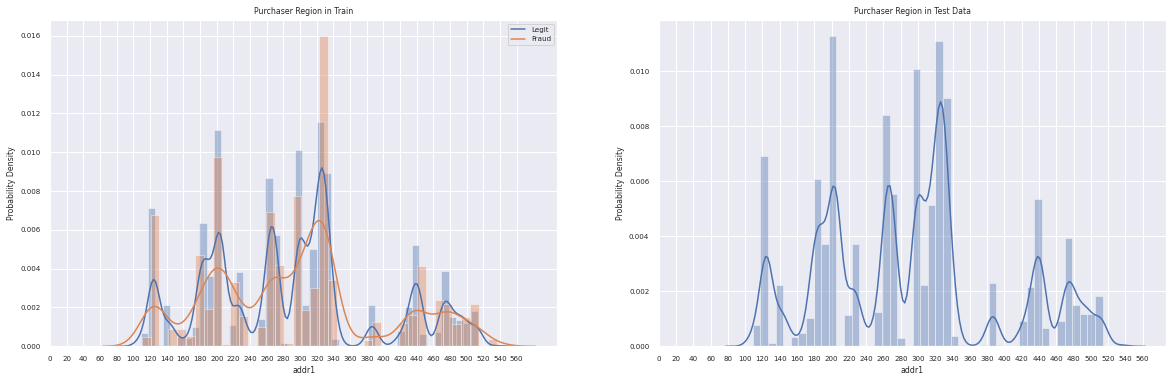

In [108]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

sns.distplot(train_addr_oth_df[(train_addr_oth_df['isFraud'] == 0) & (~train_addr_oth_df['addr1'].isnull())]['addr1'])
sns.distplot(train_addr_oth_df[(train_addr_oth_df['isFraud'] == 1) & (~train_addr_oth_df['addr1'].isnull())]['addr1'])

plt.legend(['Legit','Fraud'])

plt.xticks(np.arange(0, 580, 20))

plt.ylabel('Probability Density')
plt.title('Purchaser Region in Train')

plt.subplot(1,2,2)

sns.distplot(test_df[~test_addr_oth_df['addr1'].isnull()]['addr1'])

plt.xticks(np.arange(0, 580, 20))
plt.ylabel('Probability Density')
plt.title('Purchaser Region in Test Data')

plt.show();

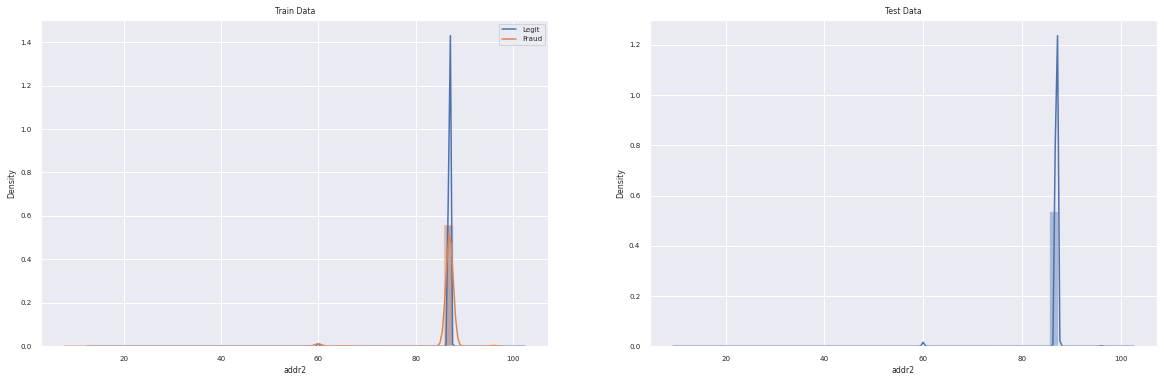

In [109]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

sns.distplot(train_addr_oth_df[(train_addr_oth_df['isFraud'] == 0) & (~train_addr_oth_df['addr2'].isnull())]['addr2'])
sns.distplot(train_addr_oth_df[(train_addr_oth_df['isFraud'] == 1) & (~train_addr_oth_df['addr2'].isnull())]['addr2'] )

plt.legend(['Legit','Fraud'])
plt.title('Train Data')

plt.subplot(1,2,2)

sns.distplot(test_df[~test_addr_oth_df['addr2'].isnull()]['addr2'])

plt.title('Test Data')
plt.show()

### Distance - 
"distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.”

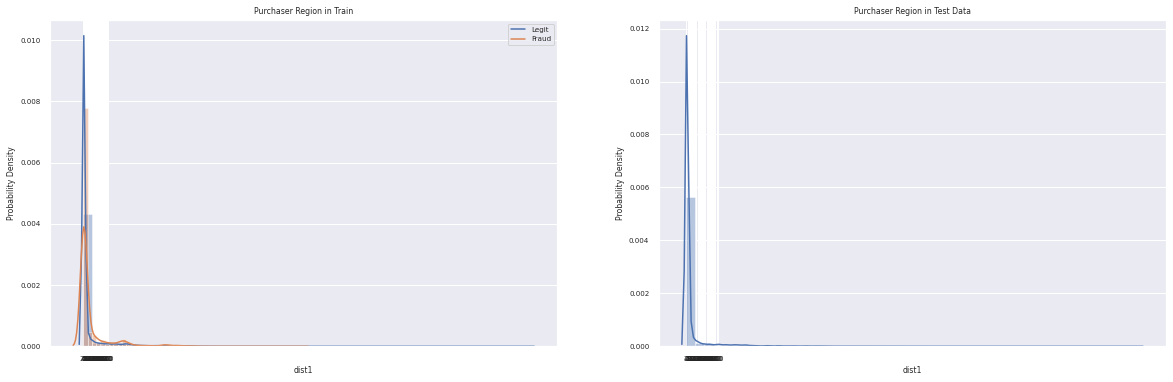

In [110]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

sns.distplot(train_addr_oth_df[(train_addr_oth_df['isFraud'] == 0) & (~train_addr_oth_df['dist1'].isnull())]['dist1'])
sns.distplot(train_addr_oth_df[(train_addr_oth_df['isFraud'] == 1) & (~train_addr_oth_df['dist1'].isnull())]['dist1'])

plt.legend(['Legit','Fraud'])

plt.xticks(np.arange(0, 580, 20))

plt.ylabel('Probability Density')
plt.title('Purchaser Region in Train')

plt.subplot(1,2,2)

sns.distplot(test_df[~test_addr_oth_df['dist1'].isnull()]['dist1'])

plt.xticks(np.arange(0, 580, 20))
plt.ylabel('Probability Density')
plt.title('Purchaser Region in Test Data')

plt.show();

In [111]:
train_addr_oth_df = pd.merge(train_addr_oth_df, train_Transaction_df, how= 'right')
train_addr_oth_df.head()

TransactionID  TransactionDT  isFraud  addr1  addr2  dist1  dist2  \
0        2987000          86400        0  315.0   87.0   19.0    NaN   
1        2987001          86401        0  325.0   87.0    NaN    NaN   
2        2987002          86469        0  330.0   87.0  287.0    NaN   
3        2987003          86499        0  476.0   87.0    NaN    NaN   
4        2987004          86506        0  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain  TransactionAmt ProductCD  day  month  \
0           NaN           NaN            68.5         W    1      1   
1     gmail.com           NaN            29.0         W    1      1   
2   outlook.com           NaN            59.0         W    1      1   
3     yahoo.com           NaN            50.0         W    1      1   
4     gmail.com           NaN            50.0         H    1      1   

   day_month  day_week  LogTransactionAmt  
0          1         1           4.226562  
1          1         1           3.367188  
2          1         1           4.078125  
3          1         1           3.912109  
4          1         1           3.912109

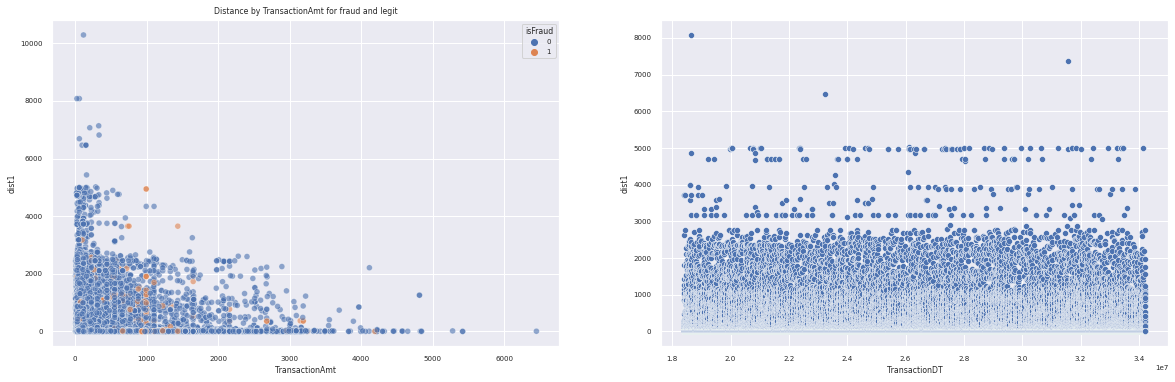

In [112]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)

sns.scatterplot(x = "TransactionAmt", y = "dist1", hue = "isFraud",data=train_addr_oth_df[~train_addr_oth_df['dist1'].isnull()], alpha = 0.6, hue_order = [0,1])
plt.title('Distance by TransactionAmt for fraud and legit')

plt.subplot(1,2,2)
sns.scatterplot(x = "TransactionDT", y = "dist1", data=test_df[~test_addr_oth_df['dist1'].isnull()])
plt.show()

### P_emaildomain

P_email domain and R_email domain 
This is the categorical variable.

Email domain of purchaser and email domain of recipient.

In [113]:
train_addr_oth_df['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100932
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com            230
t

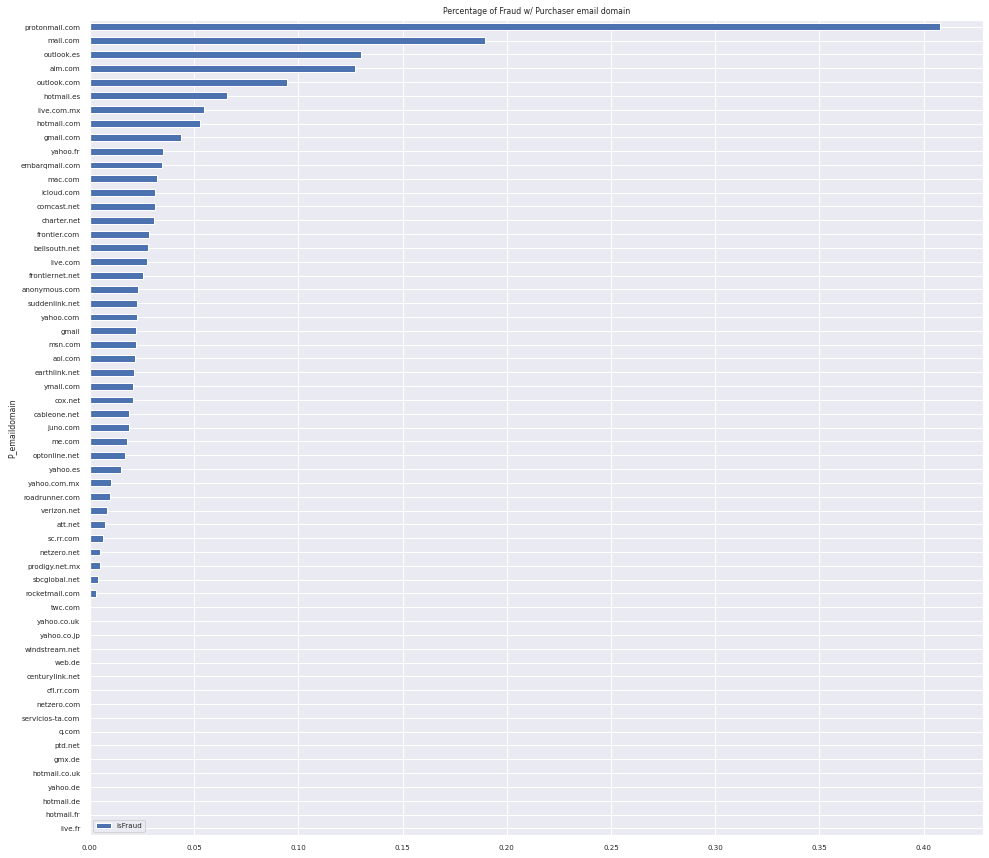

In [114]:
train_addr_oth_df[['P_emaildomain','isFraud']].groupby(by = ['P_emaildomain']).mean() \
        .sort_values(by = ['isFraud']).plot(kind = 'barh',
        figsize = (16, 15),
         title = 'Percentage of Fraud w/ Purchaser email domain')
plt.show()

### R_emaildomain

In [115]:
train_addr_oth_df['R_emaildomain'].value_counts()

gmail.com           57147
hotmail.com         27509
anonymous.com       20529
yahoo.com           11842
aol.com              3701
outlook.com          2507
comcast.net          1812
yahoo.com.mx         1508
icloud.com           1398
msn.com               852
live.com              762
live.com.mx           754
verizon.net           620
me.com                556
sbcglobal.net         552
cox.net               459
outlook.es            433
att.net               430
bellsouth.net         422
hotmail.fr            293
hotmail.es            292
web.de                237
mac.com               218
ymail.com             207
prodigy.net.mx        207
optonline.net         187
gmx.de                147
yahoo.fr              137
charter.net           127
mail.com              122
hotmail.co.uk         105
gmail                  95
earthlink.net          79
yahoo.de               75
rocketmail.com         69
embarqmail.com         68
scranton.edu           63
yahoo.es               57
live.fr     

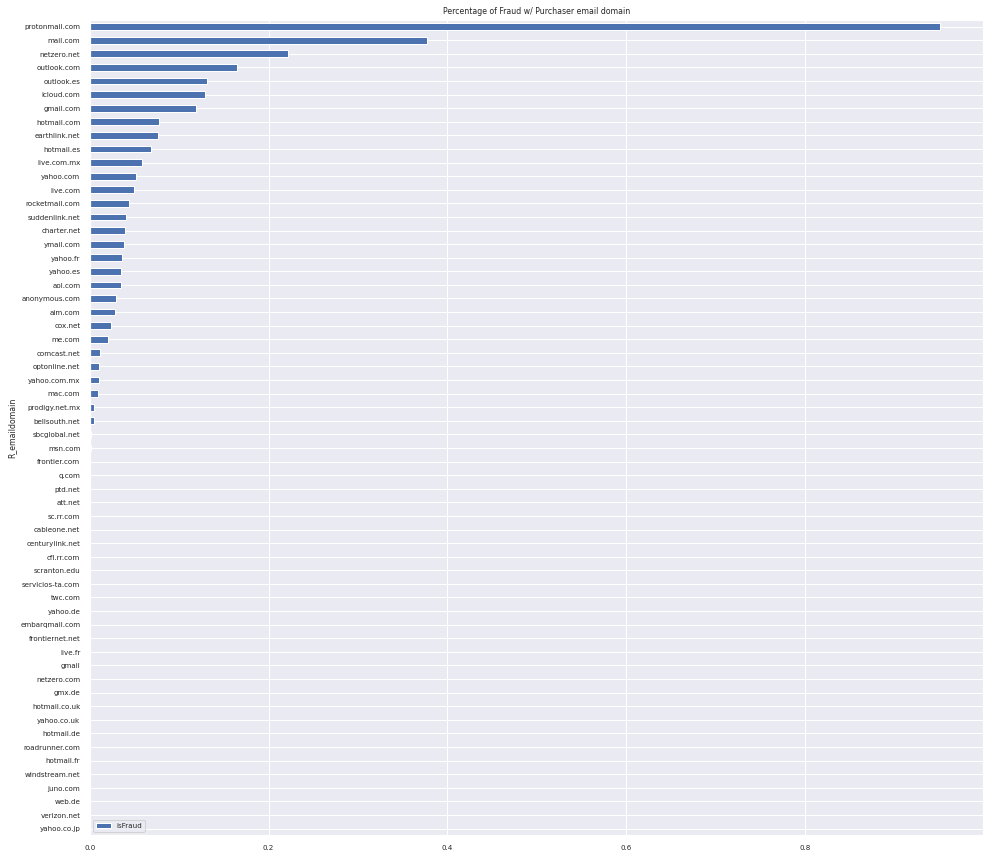

In [116]:
train_addr_oth_df[['R_emaildomain','isFraud']].groupby(by = ['R_emaildomain']).mean() \
        .sort_values(by = ['isFraud']).plot(kind = 'barh',
        figsize = (16, 15),
         title = 'Percentage of Fraud w/ Purchaser email domain')
plt.show()

convert emailll to main domain

In [117]:
train_addr_oth_df.loc[train_addr_oth_df['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

train_addr_oth_df.loc[train_addr_oth_df['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 'yahoo.de', 'yahoo.fr', 'yahoo.es']), 'P_emaildomain'] = 'Yahoo'

train_addr_oth_df.loc[train_addr_oth_df['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de', 'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'

train_addr_oth_df.loc[train_addr_oth_df.P_emaildomain.isin(train_addr_oth_df.P_emaildomain.value_counts()[train_addr_oth_df.P_emaildomain.value_counts() <= 500 ].index), 'P_emaildomain'] = "Others"

train_addr_oth_df.P_emaildomain.fillna("NoInfo", inplace=True)



train_addr_oth_df.loc[train_addr_oth_df['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

train_addr_oth_df.loc[train_addr_oth_df['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 'yahoo.de', 'yahoo.fr', 'yahoo.es']), 'R_emaildomain'] = 'Yahoo'

train_addr_oth_df.loc[train_addr_oth_df['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de', 'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'

train_addr_oth_df.loc[train_addr_oth_df.R_emaildomain.isin(train_addr_oth_df.R_emaildomain.value_counts()[train_addr_oth_df.R_emaildomain.value_counts() <= 300 ].index), 'R_emaildomain'] = "Others"

train_addr_oth_df.R_emaildomain.fillna("NoInfo", inplace=True)

In [118]:
train_df.loc[train_df['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

train_df.loc[train_df['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 'yahoo.de', 'yahoo.fr', 'yahoo.es']), 'P_emaildomain'] = 'Yahoo'

train_df.loc[train_df['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de', 'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'

train_df.loc[train_df.P_emaildomain.isin(train_df.P_emaildomain.value_counts()[train_df.P_emaildomain.value_counts() <= 500 ].index), 'P_emaildomain'] = "Others"

train_df.P_emaildomain.fillna("NoInfo", inplace=True)



train_df.loc[train_df['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

train_df.loc[train_df['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 'yahoo.de', 'yahoo.fr', 'yahoo.es']), 'R_emaildomain'] = 'Yahoo'

train_df.loc[train_df['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de', 'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'

train_df.loc[train_df.R_emaildomain.isin(train_df.R_emaildomain.value_counts()[train_df.R_emaildomain.value_counts() <= 300 ].index), 'R_emaildomain'] = "Others"

train_df.R_emaildomain.fillna("NoInfo", inplace=True)

In [119]:
test_addr_oth_df.loc[test_addr_oth_df['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

test_addr_oth_df.loc[test_addr_oth_df['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 'yahoo.de', 'yahoo.fr', 'yahoo.es']), 'P_emaildomain'] = 'Yahoo'

test_addr_oth_df.loc[test_addr_oth_df['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de', 'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'

test_addr_oth_df.loc[test_addr_oth_df.P_emaildomain.isin(test_addr_oth_df.P_emaildomain.value_counts()[test_addr_oth_df.P_emaildomain.value_counts() <= 500 ].index), 'P_emaildomain'] = "Others"

test_addr_oth_df.P_emaildomain.fillna("NoInfo", inplace=True)



test_addr_oth_df.loc[test_addr_oth_df['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

test_addr_oth_df.loc[test_addr_oth_df['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 'yahoo.de', 'yahoo.fr', 'yahoo.es']), 'R_emaildomain'] = 'Yahoo'

test_addr_oth_df.loc[test_addr_oth_df['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de', 'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'

test_addr_oth_df.loc[test_addr_oth_df.R_emaildomain.isin(test_addr_oth_df.R_emaildomain.value_counts()[test_addr_oth_df.R_emaildomain.value_counts() <= 300 ].index), 'R_emaildomain'] = "Others"

test_addr_oth_df.R_emaildomain.fillna("NoInfo", inplace=True)

In [120]:
test_df.loc[test_df['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

test_df.loc[test_df['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 'yahoo.de', 'yahoo.fr', 'yahoo.es']), 'P_emaildomain'] = 'Yahoo'

test_df.loc[test_df['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de', 'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'

test_df.loc[test_df.P_emaildomain.isin(test_df.P_emaildomain.value_counts()[test_df.P_emaildomain.value_counts() <= 500 ].index), 'P_emaildomain'] = "Others"

test_df.P_emaildomain.fillna("NoInfo", inplace=True)



test_df.loc[test_df['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

test_df.loc[test_df['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk', 'yahoo.co.jp', 'yahoo.de', 'yahoo.fr', 'yahoo.es']), 'R_emaildomain'] = 'Yahoo'

test_df.loc[test_df['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 'hotmail.es','hotmail.co.uk', 'hotmail.de', 'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'

test_df.loc[test_df.R_emaildomain.isin(test_df.R_emaildomain.value_counts()[test_df.R_emaildomain.value_counts() <= 300 ].index), 'R_emaildomain'] = "Others"

test_df.R_emaildomain.fillna("NoInfo", inplace=True)

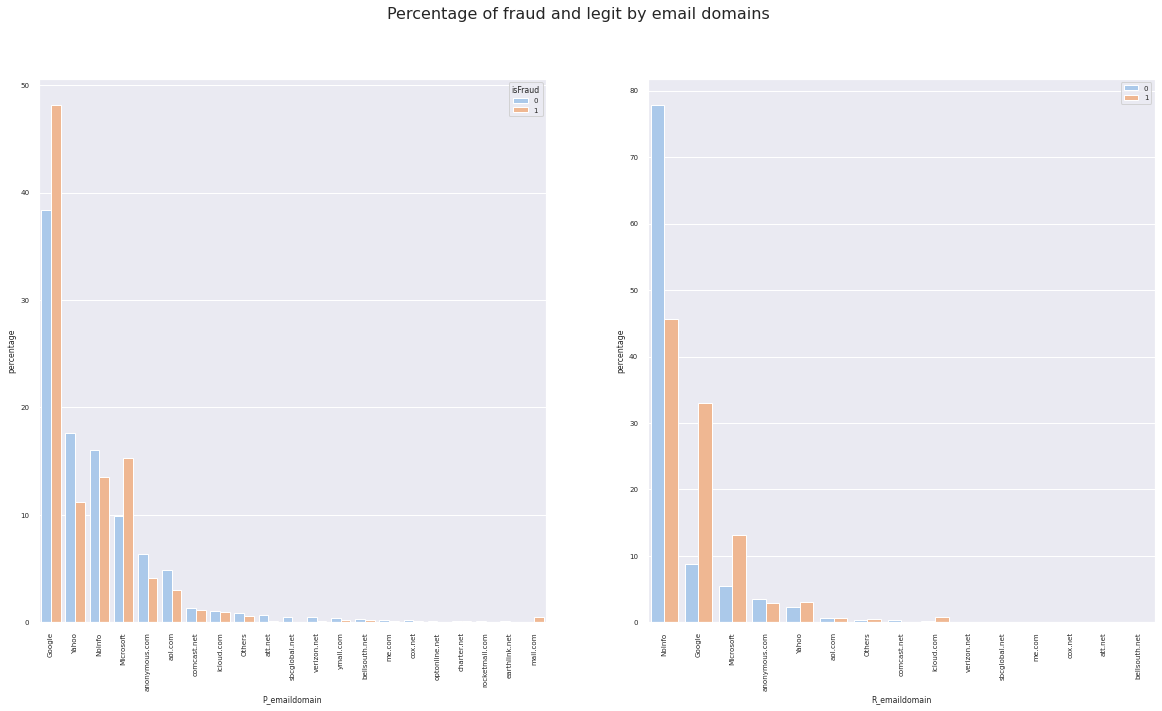

In [121]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)

train_P_email = (train_addr_oth_df[~train_addr_oth_df['P_emaildomain'].isnull()].groupby(['isFraud'])['P_emaildomain'].value_counts(normalize=True).rename('percentage').mul(100).reset_index())
sns.barplot(x = "P_emaildomain", y = "percentage", hue = "isFraud", data = train_P_email, palette = 'pastel')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)

train_R_email = train_addr_oth_df[~train_addr_oth_df['R_emaildomain'].isnull()].groupby(['isFraud'])['R_emaildomain'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
sns.barplot(x="R_emaildomain", y="percentage", hue="isFraud", data = train_R_email, palette = 'pastel')
plt.xticks(rotation=90)
plt.legend(loc = 'upper right')
plt.suptitle('Percentage of fraud and legit by email domains', fontsize = 16)

plt.show()

# feature_C
C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

In [122]:
feature_C

['TransactionID',
 'TransactionDT',
 'isFraud',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14']

In [123]:
train_df_check.apply(lambda row: row[train_df_check['index'].isin(feature_C)]).sort_values(by= 'corr offtake', ascending = False)

level_0          index    types  counts  distincts  nulls  \
432      432        isFraud     int8  590540          2      0   
430      430             C2  float16  590540       1167      0   
425      425             C8  float16  590540       1130      0   
417      417            C12  float16  590540       1066      0   
431      431             C1  float16  590540       1495      0   
428      428             C4  float16  590540       1223      0   
419      419            C10  float16  590540       1122      0   
426      426             C7  float16  590540       1069      0   
418      418            C11  float16  590540       1343      0   
423      423             C6  float16  590540       1291      0   
433      433  TransactionID    int32  590540     590540      0   
420      420  TransactionDT    int32  590540     573349      0   
415      415            C14  float16  590540       1108      0   
429      429             C3  float16  590540         27      0   
416      416            C13  float16  590540       1464      0   
427      427             C5  float16  590540        319      0   
414      414             C9  float16  590540        205      0   

     missing_ration                                            uniques  \
432             0.0                                             [0, 1]   
430             0.0  [1.0, 5.0, 2.0, 4.0, 120.0, 86.0, 145.0, 6.0, ...   
425             0.0  [0.0, 1.0, 6.0, 2.0, 5.0, 13.0, 4.0, 49.0, 12....   
417             0.0  [0.0, 2.0, 1.0, 4.0, 3.0, 5.0, 10.0, 8.0, 33.0...   
431             0.0  [1.0, 2.0, 4.0, 6.0, 127.0, 3.0, 8.0, 92.0, 19...   
428             0.0  [0.0, 1.0, 2.0, 3.0, 4.0, 46.0, 47.0, 48.0, 21...   
419             0.0  [0.0, 1.0, 93.0, 2.0, 11.0, 104.0, 3.0, 31.0, ...   
426             0.0  [0.0, 1.0, 2.0, 4.0, 46.0, 3.0, 47.0, 48.0, 10...   
418             0.0  [2.0, 1.0, 5.0, 3.0, 80.0, 4.0, 73.0, 132.0, 9...   
423             0.0  [1.0, 4.0, 3.0, 5.0, 7.0, 99.0, 2.0, 0.0, 6.0,...   
433             0.0  [2987000, 2987001, 2987002, 2987003, 2987004, ...   
420             0.0  [86400, 86401, 86469, 86499, 86506, 86510, 865...   
415             0.0  [1.0, 2.0, 3.0, 6.0, 111.0, 5.0, 79.0, 148.0, ...   
429             0.0  [0.0, 1.0, 8.0, 3.0, 2.0, 16.0, 4.0, 9.0, 10.0...   
416             0.0  [1.0, 25.0, 12.0, 2.0, 6.0, 24.0, 22.0, 673.0,...   
427             0.0  [0.0, 2.0, 1.0, 168.0, 3.0, 121.0, 142.0, 5.0,...   
414             0.0  [1.0, 0.0, 3.0, 2.0, 81.0, 4.0, 76.0, 129.0, 9...   

         skewness   kurtosis  corr offtake  
432  5.061223e+00  23.616056      1.000000  
430           NaN        NaN      0.037229  
425           NaN        NaN      0.032138  
417           NaN        NaN      0.031905  
431           NaN        NaN      0.030570  
428           NaN        NaN      0.030382  
419           NaN        NaN      0.028396  
426           NaN        NaN      0.028161  
418           NaN        NaN      0.027484  
423           NaN        NaN      0.020909  
433 -3.024053e-16  -1.200000      0.014166  
420  1.311547e-01  -1.229137      0.013103  
415           NaN        NaN      0.007921  
429           NaN        NaN     -0.006833  
416           NaN        NaN     -0.011146  
427           NaN        NaN     -0.030754  
414           NaN        NaN     -0.031703

In [124]:
train_C_df[feature_C].describe()

TransactionID  TransactionDT        isFraud        C1        C2  \
count   5.905400e+05   5.905400e+05  590540.000000  590540.0  590540.0   
mean    3.282270e+06   7.372311e+06       0.034990       NaN       NaN   
std     1.704744e+05   4.617224e+06       0.183755       NaN       NaN   
min     2.987000e+06   8.640000e+04       0.000000       0.0       0.0   
25%     3.134635e+06   3.027058e+06       0.000000       1.0       1.0   
50%     3.282270e+06   7.306528e+06       0.000000       1.0       1.0   
75%     3.429904e+06   1.124662e+07       0.000000       3.0       3.0   
max     3.577539e+06   1.581113e+07       1.000000    4684.0    5692.0   

             C3        C4        C5        C6        C7        C8        C9  \
count  590540.0  590540.0  590540.0  590540.0  590540.0  590540.0  590540.0   
mean        0.0       NaN       NaN       NaN       NaN       NaN       NaN   
std         0.0       NaN       NaN       NaN       NaN       NaN       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         0.0       0.0       0.0       1.0       0.0       0.0       0.0   
50%         0.0       0.0       0.0       1.0       0.0       0.0       1.0   
75%         0.0       0.0       1.0       2.0       0.0       0.0       2.0   
max        26.0    2252.0     349.0    2252.0    2256.0    3332.0     210.0   

            C10       C11       C12       C13       C14  
count  590540.0  590540.0  590540.0  590540.0  590540.0  
mean        NaN       NaN       NaN       NaN       NaN  
std         NaN       NaN       NaN       NaN       NaN  
min         0.0       0.0       0.0       0.0       0.0  
25%         0.0       1.0       0.0       1.0       1.0  
50%         0.0       1.0       0.0       3.0       1.0  
75%         0.0       2.0       0.0      12.0       2.0  
max      3256.0    3188.0    3188.0    2918.0    1429.0

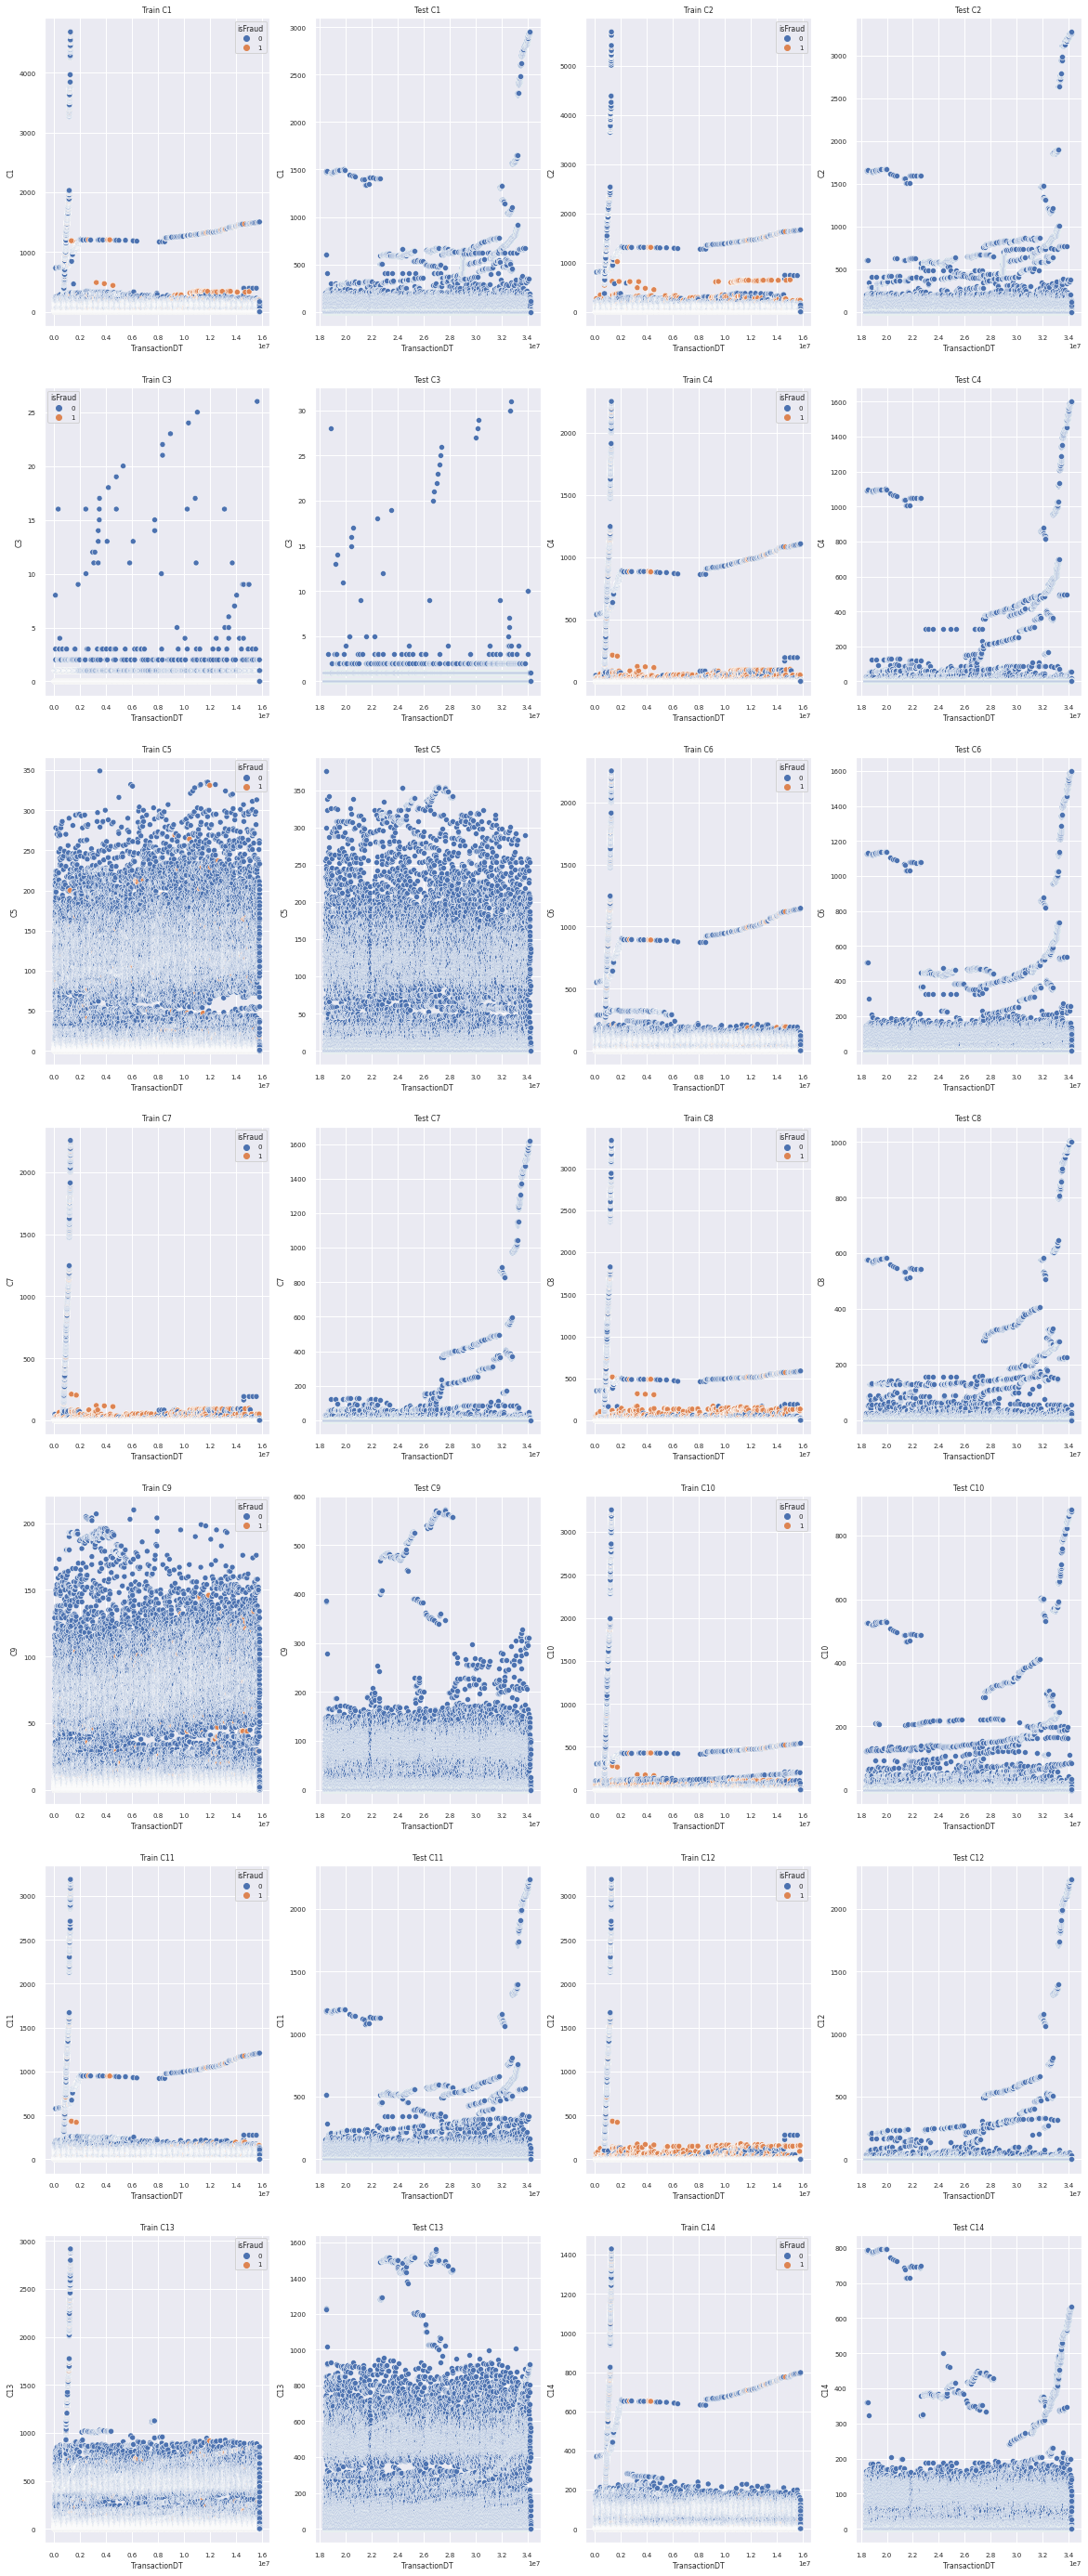

In [125]:
plt.figure(figsize = (20, 50))

var = ['C' + str(i) for i in range(1, 15)]
i = 1
for col in var:
    plt.subplot(7,4,i)
    sns.scatterplot(x = "TransactionDT", y = col, hue = "isFraud", data = train_C_df[~train_C_df[col].isnull()])
    plt.title('Train '+ col)
    i += 1

    plt.subplot(7,4,i)
    sns.scatterplot(x = "TransactionDT", y = col, data = test_C_df[~test_C_df[col].isnull()] )
    plt.title('Test '+ col)

    i += 1

plt.show();

In [126]:
feature_C = ['TransactionID',
 'TransactionDT',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'isFraud']

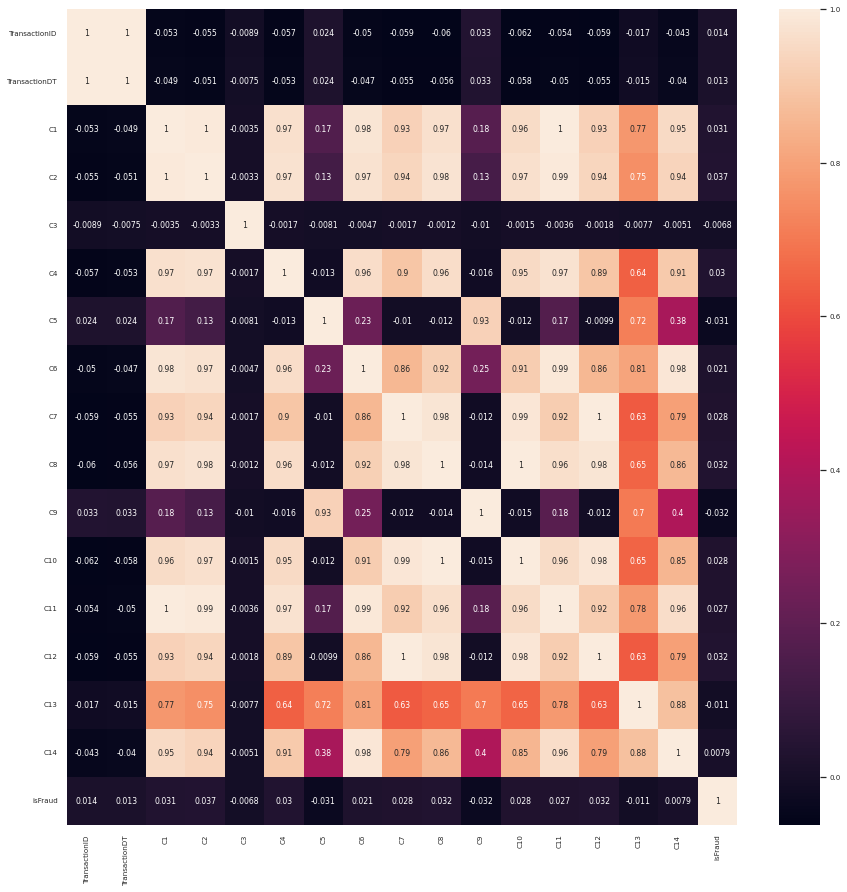

In [127]:
f = train_C_df[feature_C].corr()
plt.figure(1,figsize = (15,15))
sns.heatmap(f,annot = True)
plt.show();

# feature_D
D1-D15: timedelta, such as days between previous transaction, etc.

In [128]:
feature_D

['TransactionID',
 'TransactionDT',
 'isFraud',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15']

In [129]:
train_df_check.apply(lambda row: row[train_df_check['index'].isin(feature_D)]).sort_values(by= 'corr offtake', ascending = False)

level_0          index    types  counts  distincts   nulls  \
432      432        isFraud     int8  590540          2       0   
433      433  TransactionID    int32  590540     590540       0   
420      420  TransactionDT    int32  590540     573349       0   
13        13            D14  float16   62187        803  528353   
14        14            D12  float16   64717        636  525823   
21        21             D9  float16   74926         25  515614   
223      223            D11  float16  311253        677  279287   
231      231             D3  float16  327662        650  262878   
17        17             D6  float16   73187        830  517353   
12        12            D13  float16   61952        578  528588   
213      213             D5  float16  280699        689  309841   
338      338             D1  float16  589271        642    1269   
251      251             D4  float16  421618        809  168922   
319      319            D10  float16  514518        819   76022   
273      273            D15  float16  501427        860   89113   
215      215             D2  float16  309743        642  280797   
10        10             D7  float16   38917        598  551623   
22        22             D8  float16   74926       5368  515614   

     missing_ration                                            uniques  \
432        0.000000                                             [0, 1]   
433        0.000000  [2987000, 2987001, 2987002, 2987003, 2987004, ...   
420        0.000000  [86400, 86401, 86469, 86499, 86506, 86510, 865...   
13        89.469469  [nan, 0.0, 98.0, 97.0, 2.0, 18.0, 50.0, 386.0,...   
14        89.041047  [nan, 0.0, 35.0, 163.0, 398.0, 24.0, 338.0, 18...   
21        87.312290  [nan, 0.0, 0.04166, 0.0833, 0.125, 0.1666, 0.2...   
223       47.293494  [13.0, nan, 315.0, 0.0, 302.0, 423.0, 237.0, 3...   
231       44.514851  [13.0, nan, 0.0, 30.0, 11.0, 10.0, 2.0, 3.0, 3...   
17        87.606767  [nan, 0.0, 537.0, 35.0, 216.0, 163.0, 398.0, 2...   
12        89.509263  [nan, 0.0, 24.0, 18.0, 21.0, 58.0, 367.0, 47.0...   
213       52.467403  [nan, 0.0, 30.0, 11.0, 10.0, 2.0, 40.0, 35.0, ...   
338        0.214888  [14.0, 0.0, 112.0, 61.0, 1.0, 72.0, 46.0, 62.0...   
251       28.604667  [nan, 0.0, 94.0, 318.0, 107.0, 45.0, 35.0, 358...   
319       12.873302  [13.0, 0.0, 84.0, nan, 40.0, 107.0, 45.0, 465....   
273       15.090087  [0.0, 315.0, 111.0, nan, 318.0, 107.0, 45.0, 6...   
215       47.549192  [nan, 112.0, 61.0, 1.0, 72.0, 46.0, 62.0, 485....   
10        93.409930  [nan, 0.0, 4.0, 8.0, 163.0, 48.0, 24.0, 11.0, ...   
22        87.312290  [nan, 83.0, 26.0, 21.0, 29.0, 189.0, 126.0, 77...   

         skewness   kurtosis  corr offtake  
432  5.061223e+00  23.616056      1.000000  
433 -3.024053e-16  -1.200000      0.014166  
420  1.311547e-01  -1.229137      0.013103  
13            inf        NaN     -0.008663  
14            inf        NaN     -0.028864  
21            NaN        NaN     -0.044250  
223           NaN        NaN     -0.045094  
231           NaN        NaN     -0.046271  
17            NaN        NaN     -0.057236  
12            inf        NaN     -0.059430  
213           NaN        NaN     -0.064638  
338           NaN        NaN     -0.067193  
251           NaN        NaN     -0.067216  
319           NaN        NaN     -0.072002  
273           NaN        NaN     -0.077519  
215           NaN        NaN     -0.083583  
10            inf        NaN     -0.127199  
22            NaN        NaN     -0.142634

In [130]:
train_D_df.head()

TransactionID  TransactionDT  isFraud     D1     D2    D3    D4   D5  D6  \
0        2987000          86400        0   14.0    NaN  13.0   NaN  NaN NaN   
1        2987001          86401        0    0.0    NaN   NaN   0.0  NaN NaN   
2        2987002          86469        0    0.0    NaN   NaN   0.0  NaN NaN   
3        2987003          86499        0  112.0  112.0   0.0  94.0  0.0 NaN   
4        2987004          86506        0    0.0    NaN   NaN   NaN  NaN NaN   

   D7  D8  D9   D10    D11  D12  D13  D14    D15  
0 NaN NaN NaN  13.0   13.0  NaN  NaN  NaN    0.0  
1 NaN NaN NaN   0.0    NaN  NaN  NaN  NaN    0.0  
2 NaN NaN NaN   0.0  315.0  NaN  NaN  NaN  315.0  
3 NaN NaN NaN  84.0    NaN  NaN  NaN  NaN  111.0  
4 NaN NaN NaN   NaN    NaN  NaN  NaN  NaN    NaN

In [131]:
train_D_df.describe()

TransactionID  TransactionDT        isFraud        D1        D2  \
count   5.905400e+05   5.905400e+05  590540.000000  589271.0  309743.0   
mean    3.282270e+06   7.372311e+06       0.034990       NaN       NaN   
std     1.704744e+05   4.617224e+06       0.183755       NaN       NaN   
min     2.987000e+06   8.640000e+04       0.000000       0.0       0.0   
25%     3.134635e+06   3.027058e+06       0.000000       0.0      26.0   
50%     3.282270e+06   7.306528e+06       0.000000       3.0      97.0   
75%     3.429904e+06   1.124662e+07       0.000000     122.0     276.0   
max     3.577539e+06   1.581113e+07       1.000000     640.0     640.0   

             D3        D4        D5       D6       D7            D8  \
count  327662.0  421618.0  280699.0  73187.0  38917.0  74926.000000   
mean        NaN       NaN       NaN      NaN      inf           NaN   
std         NaN       NaN       NaN      NaN      inf           NaN   
min         0.0    -122.0       0.0    -83.0      0.0      0.000000   
25%         1.0       0.0       1.0      0.0      0.0      0.958496   
50%         8.0      26.0      10.0      0.0      0.0     37.875000   
75%        27.0     253.0      32.0     40.0     17.0    188.000000   
max       819.0     869.0     819.0    873.0    843.0   1708.000000   

                 D9       D10       D11      D12      D13      D14       D15  
count  74926.000000  514518.0  311253.0  64717.0  61952.0  62187.0  501427.0  
mean       0.000000       NaN       NaN      inf      inf      inf       NaN  
std        0.000000       NaN       NaN      inf      inf      inf       NaN  
min        0.000000       0.0     -53.0    -83.0      0.0   -193.0     -83.0  
25%        0.208374       0.0       0.0      0.0      0.0      0.0       0.0  
50%        0.666504      15.0      43.0      0.0      0.0      0.0      52.0  
75%        0.833496     197.0     274.0     13.0      0.0      2.0     314.0  
max        0.958496     876.0     670.0    648.0    847.0    878.0     879.0

In [132]:
plt.figure(figsize = (25,52))

vars = ['D' + str(i) for i in range(1,16)]
i = 1
for col in vars:
    plt.subplot(8,4,i)
    sns.scatterplot(x = "TransactionDT", y = col, hue = "isFraud", data = train_D_df[~train_D_df[col].isnull()])
    plt.title('Train Feature '+col)
    i += 1


    plt.subplot(8,4,i)
    sns.scatterplot(x = "TransactionDT", y = col, data = test_D_df[~test_D_df[col].isnull()])
    plt.title('Test Feature '+col)
    i += 1

plt.show();

Output hidden; open in https://colab.research.google.com to view.

In [133]:
feature_D = ['TransactionID',
 'TransactionDT',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
'isFraud']

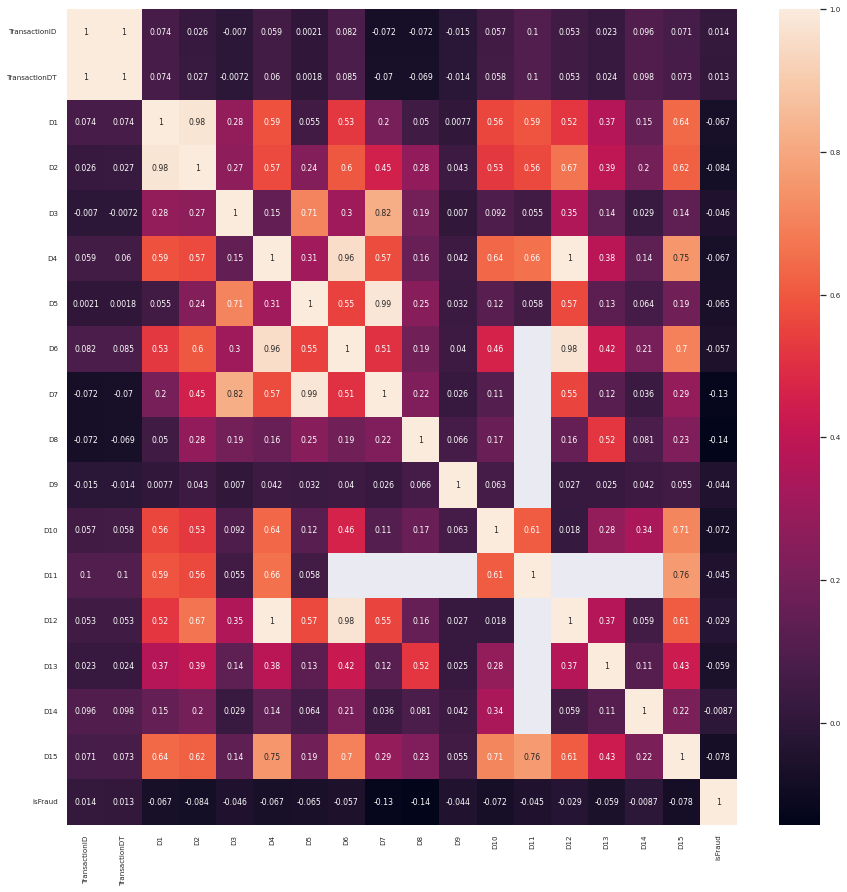

In [134]:
f = train_D_df[feature_D].corr()
plt.figure(1,figsize = (15,15))
sns.heatmap(f,annot = True)
plt.show();

# feature_M
M1-M9: match, such as names on card and address, etc.

In [135]:
feature_M

['TransactionID',
 'TransactionDT',
 'isFraud',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [136]:
train_df_check.apply(lambda row: row[train_df_check['index'].isin(feature_M)]).sort_values(by= 'corr offtake', ascending = False)

level_0          index   types  counts  distincts   nulls  \
432      432        isFraud    int8  590540          2       0   
433      433  TransactionID   int32  590540     590540       0   
420      420  TransactionDT   int32  590540     573349       0   
209      209             M5  object  240058          3  350482   
210      210             M7  object  244275          3  346265   
211      211             M9  object  244288          3  346252   
212      212             M8  object  244288          3  346252   
214      214             M4  object  309096          4  281444   
228      228             M2  object  319440          3  271100   
229      229             M3  object  319440          3  271100   
230      230             M1  object  319440          3  271100   
232      232             M6  object  421180          3  169360   

     missing_ration                                            uniques  \
432        0.000000                                             [0, 1]   
433        0.000000  [2987000, 2987001, 2987002, 2987003, 2987004, ...   
420        0.000000  [86400, 86401, 86469, 86499, 86506, 86510, 865...   
209       59.349409                                        [F, T, nan]   
210       58.635317                                        [nan, F, T]   
211       58.633115                                        [nan, F, T]   
212       58.633115                                        [nan, F, T]   
214       47.658753                                  [M2, M0, nan, M1]   
228       45.907136                                        [T, nan, F]   
229       45.907136                                        [T, nan, F]   
230       45.907136                                        [T, nan, F]   
232       28.678836                                        [T, F, nan]   

         skewness   kurtosis  corr offtake  
432  5.061223e+00  23.616056      1.000000  
433 -3.024053e-16  -1.200000      0.014166  
420  1.311547e-01  -1.229137      0.013103  
209           NaN        NaN           NaN  
210           NaN        NaN           NaN  
211           NaN        NaN           NaN  
212           NaN        NaN           NaN  
214           NaN        NaN           NaN  
228           NaN        NaN           NaN  
229           NaN        NaN           NaN  
230           NaN        NaN           NaN  
232           NaN        NaN           NaN

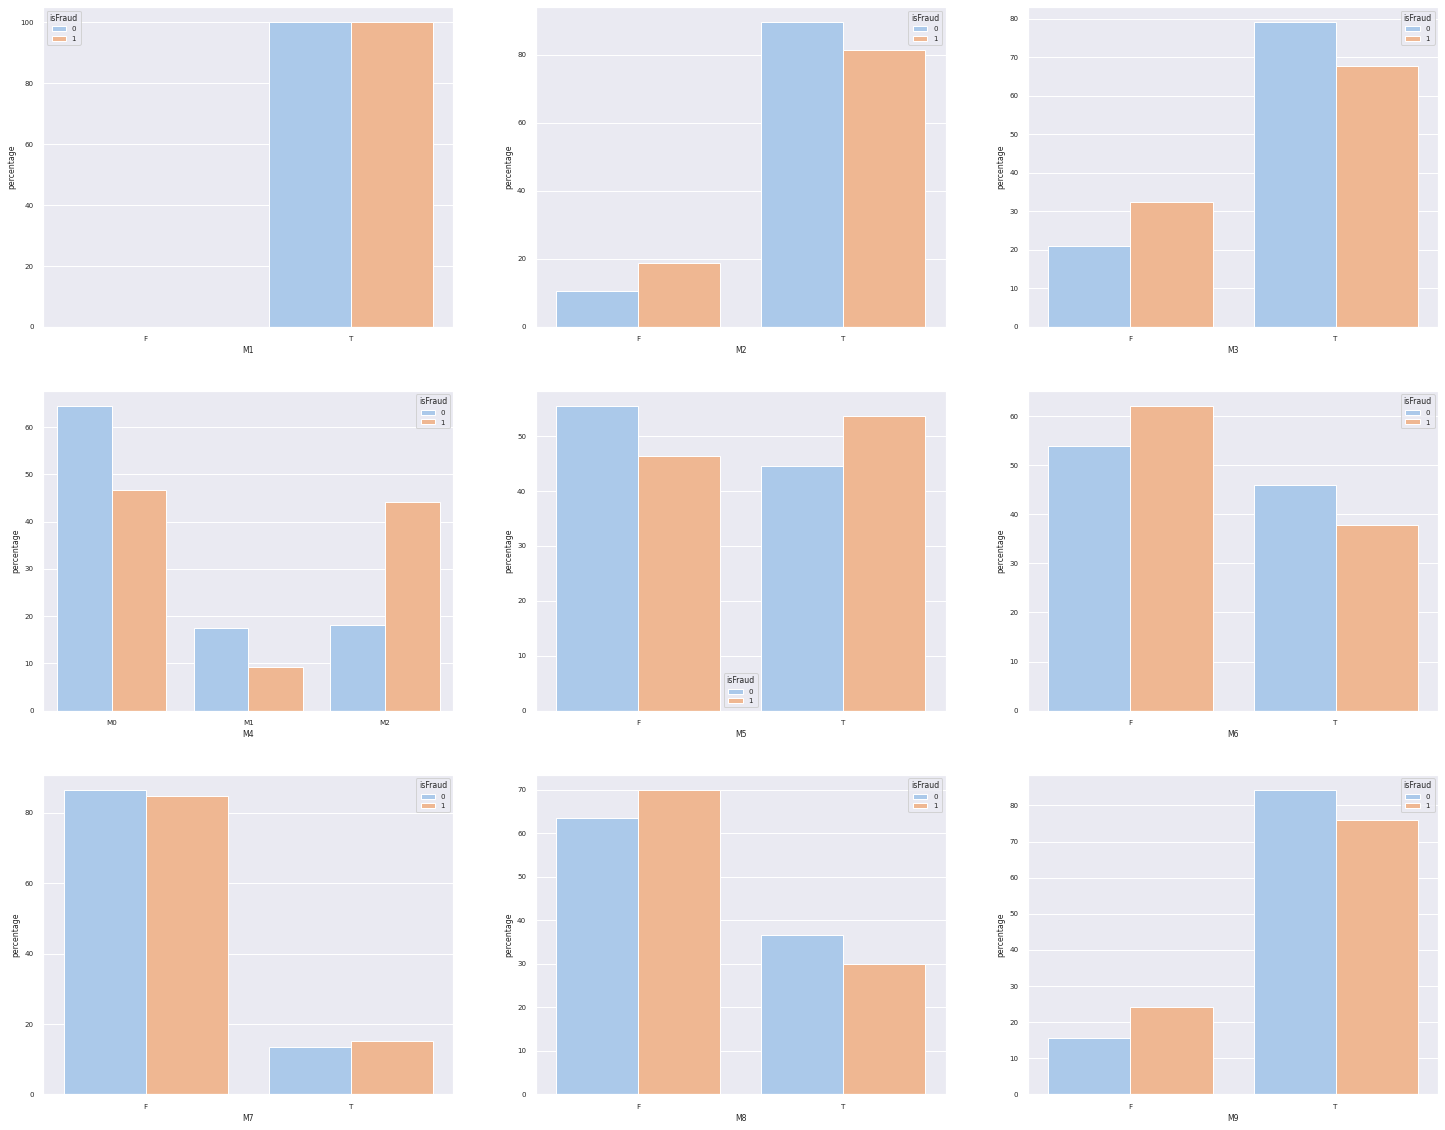

In [137]:
plt.figure(figsize = (25,20))

var = ['train_m' + str(i) for i in range(1,10)]
col = ['M' + str(i) for i in range(1,10)]

for i, j, k in zip( var, col, range(1,10)):

    i = (train_M_df.groupby(['isFraud'])[j]
         
                         .value_counts(normalize = True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values(j))
    
    plt.subplot(3,3,k)
    sns.barplot(x = j, y = "percentage", hue = "isFraud", data = i, palette = 'pastel')

plt.show();

# feature_V
Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

In [138]:
feature_V_check = train_df_check.apply(lambda row: row[train_df_check['index'].isin(feature_V)]).sort_values(by= 'corr offtake', ascending = False)
feature_V_check.head(10)

level_0    index    types  counts  distincts   nulls  missing_ration  \
432      432  isFraud     int8  590540          2       0        0.000000   
82        82     V257  float16  130430         50  460110       77.913435   
101      101     V246  float16  130430         47  460110       77.913435   
120      120     V244  float16  130430         24  460110       77.913435   
84        84     V242  float16  130430         22  460110       77.913435   
173      173     V201  float16  139819         57  450721       76.323534   
161      161     V200  float16  139819         47  450721       76.323534   
162      162     V189  float16  139819         32  450721       76.323534   
163      163     V188  float16  139819         32  450721       76.323534   
83        83     V258  float16  130430         68  460110       77.913435   

                                               uniques  skewness   kurtosis  \
432                                             [0, 1]  5.061223  23.616056   
82   [nan, 1.0, 2.0, 3.0, 7.0, 4.0, 8.0, 9.0, 10.0,...       NaN        NaN   
101  [nan, 1.0, 2.0, 7.0, 4.0, 3.0, 8.0, 9.0, 10.0,...       NaN        NaN   
120  [nan, 1.0, 2.0, 7.0, 4.0, 8.0, 9.0, 10.0, 11.0...       NaN        NaN   
84   [nan, 1.0, 2.0, 7.0, 4.0, 8.0, 9.0, 10.0, 3.0,...       NaN        NaN   
173  [nan, 1.0, 2.0, 0.0, 3.0, 4.0, 8.0, 9.0, 5.0, ...       NaN        NaN   
161  [nan, 1.0, 2.0, 0.0, 3.0, 4.0, 7.0, 5.0, 6.0, ...       NaN        NaN   
162  [nan, 1.0, 2.0, 0.0, 4.0, 3.0, 5.0, 6.0, 7.0, ...       NaN        NaN   
163  [nan, 1.0, 2.0, 0.0, 4.0, 3.0, 5.0, 6.0, 7.0, ...       NaN        NaN   
83   [nan, 1.0, 2.0, 3.0, 60.0, 4.0, 61.0, 62.0, 63...       NaN        NaN   

     corr offtake  
432      1.000000  
82       0.383060  
101      0.366878  
120      0.364129  
84       0.360590  
173      0.328005  
161      0.318783  
162      0.308219  
163      0.303582  
83       0.297151

In [139]:
feature_V_check_30_list = feature_V_check[feature_V_check['corr offtake'] >0.30]['index'].tolist()
feature_V_check_20_list = feature_V_check[(feature_V_check['corr offtake'] >=0.20) &(feature_V_check['corr offtake'] < 0.30)]['index'].tolist()
feature_V_check_10_list = feature_V_check[(feature_V_check['corr offtake'] >=0.10) &(feature_V_check['corr offtake'] < 0.20)]['index'].tolist()
feature_V_check_5_list = feature_V_check[(feature_V_check['corr offtake'] >=0.5) &(feature_V_check['corr offtake'] < 0.10)]['index'].tolist()
feature_V_check_1_list = feature_V_check[(feature_V_check['corr offtake'] >= 0.1) &(feature_V_check['corr offtake'] < 0.5)]['index'].tolist()
feature_V_check_0_list = feature_V_check[(feature_V_check['corr offtake'] > 0.0) &(feature_V_check['corr offtake'] < 0.1)]['index'].tolist()

In [140]:
print(len(feature_V_check_30_list), len(feature_V_check_20_list), len(feature_V_check_10_list), len(feature_V_check_5_list), len(feature_V_check_1_list), len(feature_V_check_0_list))

9 24 73 0 105 130


# feature_Device

In [141]:
feature_Device

['TransactionID', 'TransactionDT', 'isFraud', 'DeviceType', 'DeviceInfo']

In [142]:
feature_Device_check = train_df_check.apply(lambda row: row[train_df_check['index'].isin(feature_Device)]).sort_values(by= 'corr offtake', ascending = False)
feature_Device_check.head(10)

level_0          index   types  counts  distincts   nulls  \
432      432        isFraud    int8  590540          2       0   
433      433  TransactionID   int32  590540     590540       0   
420      420  TransactionDT   int32  590540     573349       0   
74        74     DeviceInfo  object  118666       1787  471874   
180      180     DeviceType  object  140810          3  449730   

     missing_ration                                            uniques  \
432        0.000000                                             [0, 1]   
433        0.000000  [2987000, 2987001, 2987002, 2987003, 2987004, ...   
420        0.000000  [86400, 86401, 86469, 86499, 86506, 86510, 865...   
74        79.905510  [nan, SAMSUNG SM-G892A Build/NRD90M, iOS Devic...   
180       76.155722                             [nan, mobile, desktop]   

         skewness   kurtosis  corr offtake  
432  5.061223e+00  23.616056      1.000000  
433 -3.024053e-16  -1.200000      0.014166  
420  1.311547e-01  -1.229137      0.013103  
74            NaN        NaN           NaN  
180           NaN        NaN           NaN

In [143]:
train_Dev_df['DeviceInfo'].value_counts()

Windows                                        47722
iOS Device                                     19782
MacOS                                          12573
Trident/7.0                                     7440
rv:11.0                                         1901
rv:57.0                                          962
SM-J700M Build/MMB29K                            549
SM-G610M Build/MMB29K                            461
SM-G531H Build/LMY48B                            410
rv:59.0                                          362
SM-G935F Build/NRD90M                            334
SM-G955U Build/NRD90M                            328
SM-G532M Build/MMB29T                            316
ALE-L23 Build/HuaweiALE-L23                      312
SM-G950U Build/NRD90M                            290
SM-G930V Build/NRD90M                            274
rv:58.0                                          269
rv:52.0                                          256
SAMSUNG                                       

In [144]:
train_df.shape

(590538, 435)

In [145]:
import gc

In [146]:
# Maping each device to their corresponding brand.
def device_to_brand(dataframe):
    dataframe['device_name'] = dataframe['DeviceInfo'].str.split('/', expand=True)[0]
    dataframe['device_version'] = dataframe['DeviceInfo'].str.split('/', expand=True)[1]

    dataframe.loc[dataframe['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
    dataframe.loc[dataframe['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
    dataframe.loc[dataframe['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
    dataframe.loc[dataframe['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
    dataframe.loc[dataframe['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
    dataframe.loc[dataframe['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'

    dataframe.loc[dataframe.device_name.isin(dataframe.device_name.value_counts()[dataframe.device_name.value_counts() < 200].index), 'device_name'] = "Others"
    
    gc.collect()
    
    return dataframe

In [147]:
train_df = device_to_brand(train_df)
train_df['device_name'].value_counts()

Windows       47722
iOS Device    19782
MacOS         12573
Samsung       12092
Trident        7440
Others         5530
RV             4385
Motorola       2935
Huawei         2377
LG             2331
Sony            575
ZTE             518
HTC             406
Name: device_name, dtype: int64

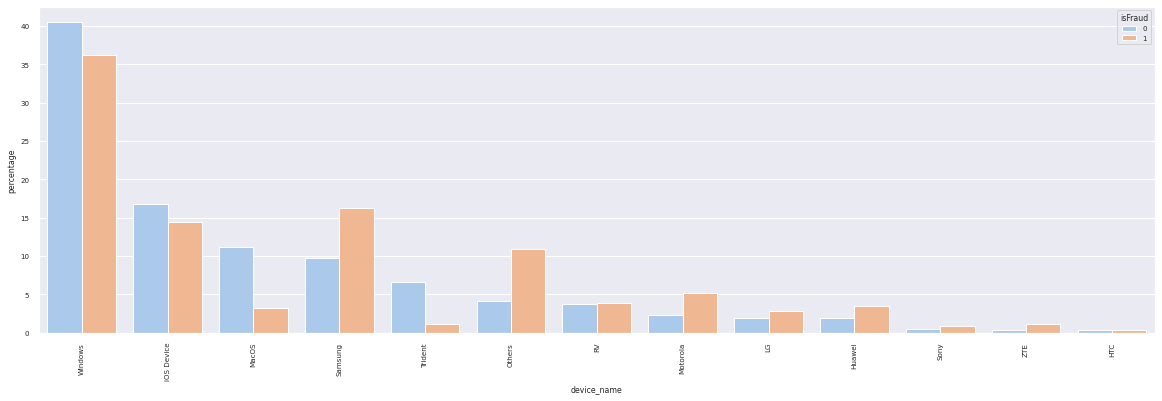

In [148]:
plt.figure(figsize=(20,6))

train_devicel = (train_df[~train_df['device_name'].isnull()].groupby(['isFraud'])['device_name'].value_counts(normalize=True).rename('percentage').mul(100).reset_index())
sns.barplot(x = "device_name", y = "percentage", hue = "isFraud", data = train_devicel, palette = 'pastel')
plt.xticks(rotation = 90)
plt.show()

In [149]:
test_df = device_to_brand(test_df)
test_df['device_name'].value_counts()

Windows       44988
iOS Device    18720
Samsung       13268
MacOS         11149
Others         6273
Motorola       5220
Trident        4890
Huawei         4418
RV             2812
LG             2023
ZTE             638
Sony            414
HTC             244
Name: device_name, dtype: int64

<AxesSubplot:xlabel='device_name', ylabel='count'>

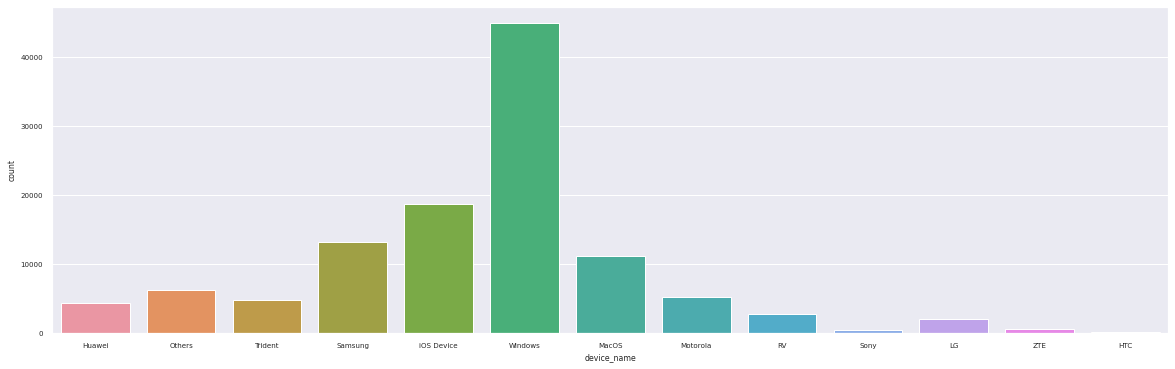

In [150]:
plt.figure(figsize=(20,6))
sns.countplot(test_df['device_name'])

In [151]:
# Removing this feature because I have created some features from this.
train_df.drop(["DeviceInfo"], axis=1, inplace=True)
test_df.drop(["DeviceInfo"], axis=1, inplace=True)

In [152]:
train_df.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0        NoInfo        NoInfo  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1        Google        NoInfo  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2     Microsoft        NoInfo  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3         Yahoo        NoInfo  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4        Google        NoInfo  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  \
0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  

In [153]:
train_Dev_df['DeviceType'].value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

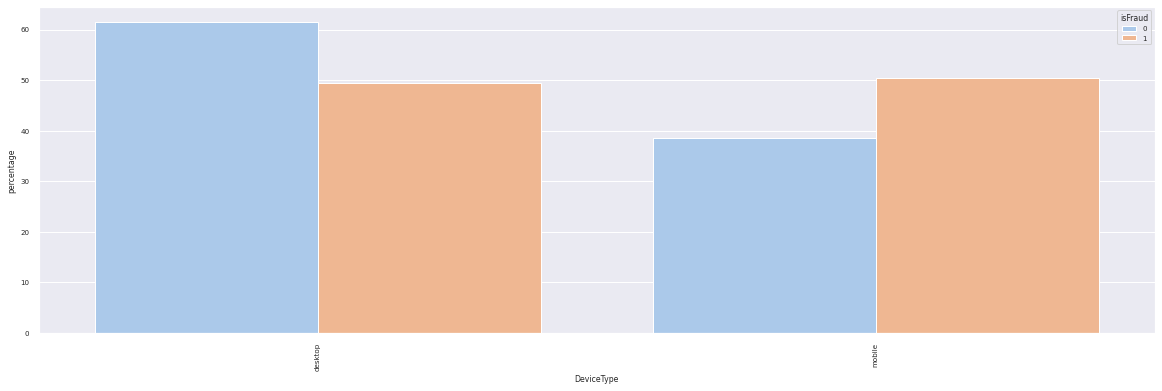

In [154]:
plt.figure(figsize=(20,6))

train_devicel = (train_df[~train_df['DeviceType'].isnull()].groupby(['isFraud'])['DeviceType'].value_counts(normalize=True).rename('percentage').mul(100).reset_index())
sns.barplot(x = "DeviceType", y = "percentage", hue = "isFraud", data = train_devicel, palette = 'pastel')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='DeviceType', ylabel='count'>

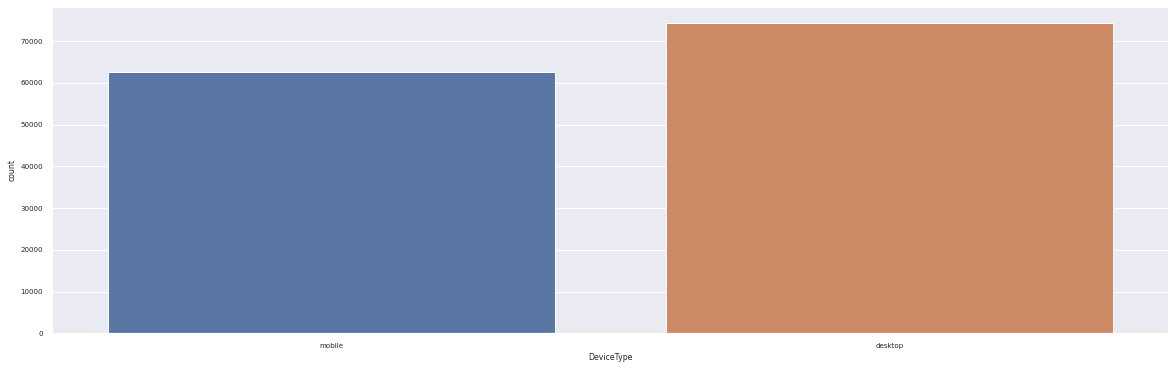

In [155]:
plt.figure(figsize=(20,6))
sns.countplot(test_df['DeviceType'])

In [156]:
train_df.shape

(590538, 436)

In [157]:
test_df.shape

(506691, 435)

In [158]:
#Train data column count and their values
print("Total number of columns are:",train_df.shape[1])
print("="*50)
print("The train features are:" , train_df.columns.tolist())

Total number of columns are: 436
The train features are: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', '

In [159]:
#Train data column count and their values
print("Total number of columns are:",test_df.shape[1])
print("="*50)
print("The test features are:" , test_df.columns.tolist())

Total number of columns are: 435
The test features are: ['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75',

In [160]:
train_df2 = train_df.copy()
test_df2 = test_df.copy()

In [161]:
pickle.dump(train_df2,open('/content/drive/MyDrive/fraud/kaggle/train_pickle/train_df2.pickle', 'wb'))
pickle.dump(test_df2,open('/content/drive/MyDrive/fraud/kaggle/test_pickle/test_df2.pickle', 'wb'))